In [21]:
%load_ext autoreload
%autoreload 2
import sys

# instead of creating a package using setup.py or building from a docker/singularity file,
# import the sister directory of src code to be called on in notebook.
# This keeps the notebook free from code to only hold visualizations and is easier to test
# It also helps keep the state of variables clean such that cells aren't run out of order with a mysterious state
sys.path.append("..")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
import matplotlib.pyplot as plt
import numpy as np
import emd
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from statistics import mean
import statistics
from dateutil.parser import parse
import statistics as st

In [23]:
from datetime import datetime

datetime.now()

datetime.datetime(2024, 3, 28, 17, 48, 0, 274928)

In [24]:
exp_df = pd.DataFrame()
for i in np.arange(0, 5):
    df = pd.read_csv(
        f"/home/aevans/nwp_bias/src/machine_learning/notebooks/bkln/bkln_{i}.csv"
    )
    exp_df = pd.concat([df, exp_df])

In [25]:
my_stations = exp_df["station"].unique()

In [26]:
my_stations

array(['WEST', 'TYRO', 'WANT', 'WALL', 'MEDU', 'ADDI', 'BKLN', 'SUFF',
       'FRED', 'CHES', 'OPPE', 'BURD', 'LOUI', 'GABR'], dtype=object)

In [27]:
my_stations = np.delete(my_stations, 0)
my_stations = np.delete(my_stations, 6)
my_stations = np.delete(my_stations, -3)

In [28]:
my_stations

array(['TYRO', 'WANT', 'WALL', 'MEDU', 'ADDI', 'BKLN', 'FRED', 'CHES',
       'OPPE', 'LOUI', 'GABR'], dtype=object)

In [29]:
exp_df = exp_df.sort_values("forecast_hour")

In [30]:
bkln_df = exp_df[exp_df["station"] == "BKLN"]
want_df = exp_df[exp_df["station"] == "WANT"]
tyro_df = exp_df[exp_df["station"] == "TYRO"]
wall_df = exp_df[exp_df["station"] == "WALL"]
medu_df = exp_df[exp_df["station"] == "MEDU"]
addi_df = exp_df[exp_df["station"] == "ADDI"]
fred_df = exp_df[exp_df["station"] == "FRED"]
ches_df = exp_df[exp_df["station"] == "CHES"]
oppe_df = exp_df[exp_df["station"] == "OPPE"]
gabr_df = exp_df[exp_df["station"] == "GABR"]
loui_df = exp_df[exp_df["station"] == "LOUI"]

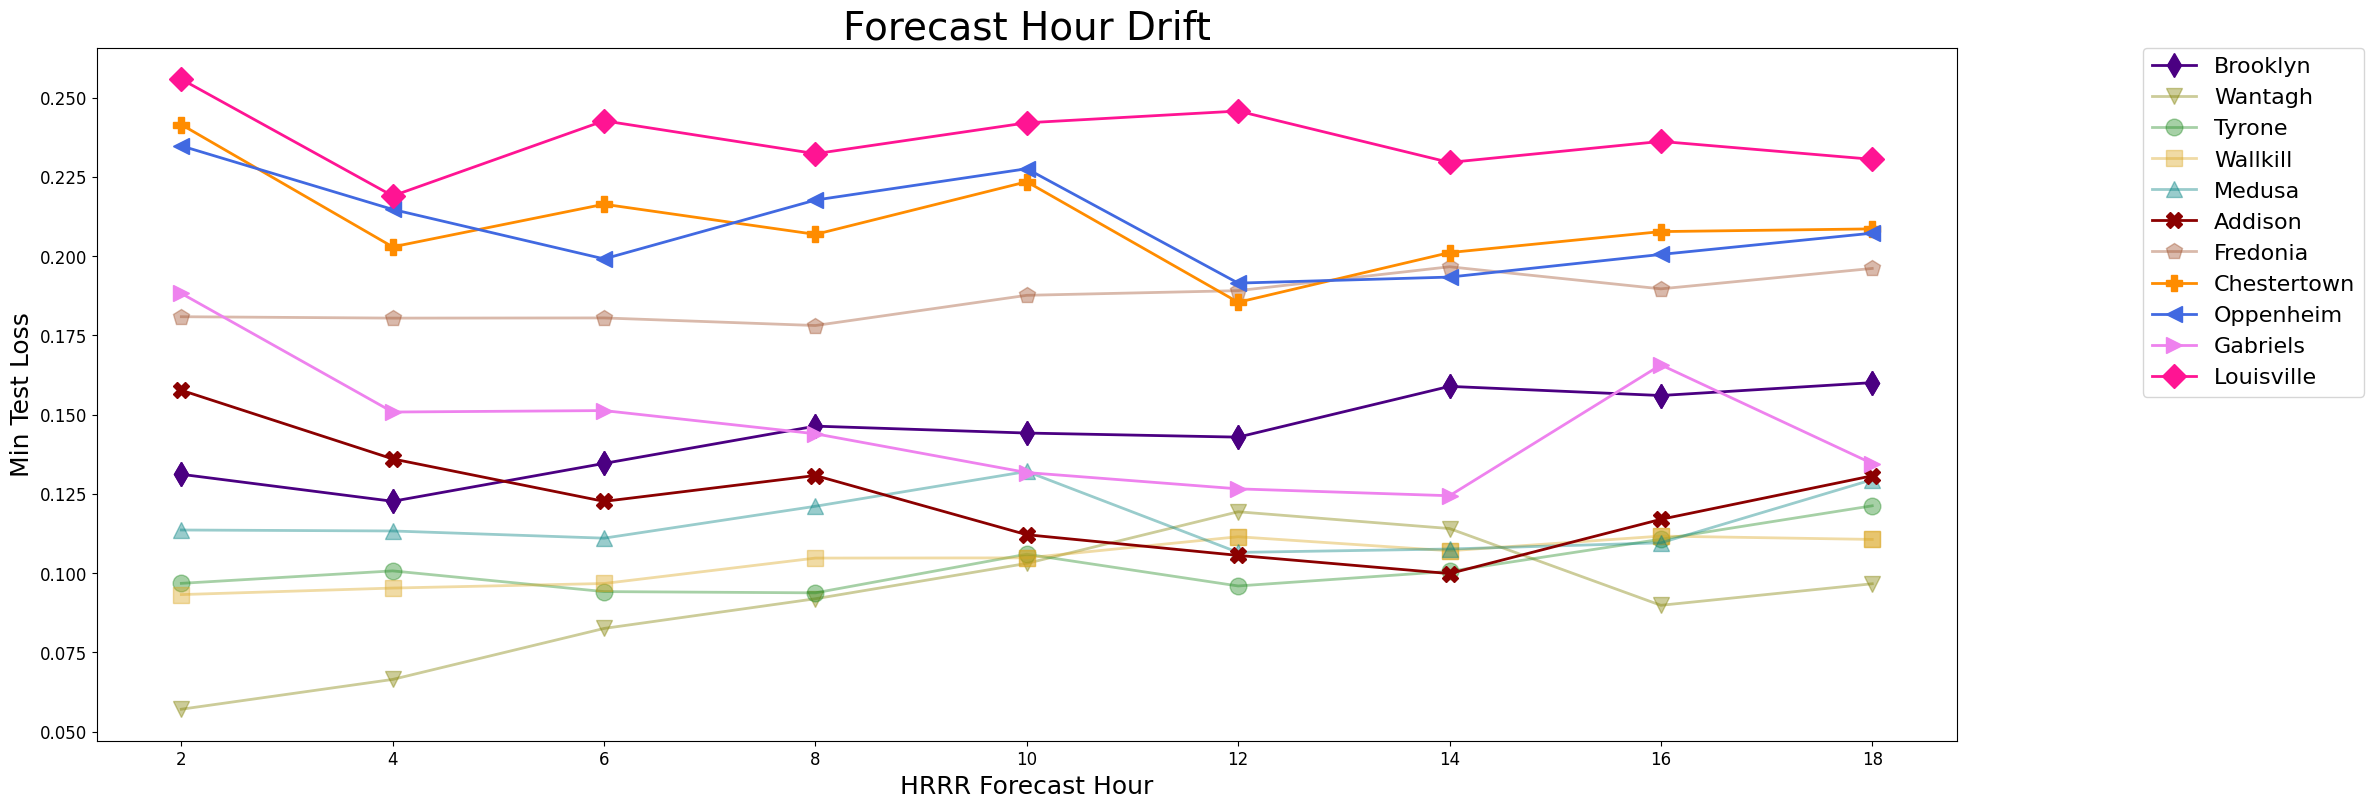

In [31]:
fig, ax = plt.subplots(figsize=(24, 9))
plt.title("Forecast Hour Drift", fontsize=28)
plt.xlabel("HRRR Forecast Hour", fontsize=18)
plt.ylabel("Min Test Loss", fontsize=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# stations
plt.plot(
    bkln_df["forecast_hour"],
    bkln_df["test_loss (Min)"],
    c="indigo",
    marker="d",
    markersize=12,
    linewidth=2,
    label="Brooklyn",
    zorder=7,
)
plt.plot(
    want_df["forecast_hour"],
    want_df["test_loss (Min)"],
    c="olive",
    marker="v",
    markersize=12,
    linewidth=2,
    label="Wantagh",
    zorder=7,
    alpha=0.4,
)
plt.plot(
    tyro_df["forecast_hour"],
    tyro_df["test_loss (Min)"],
    c="forestgreen",
    marker="o",
    markersize=12,
    linewidth=2,
    label="Tyrone",
    zorder=7,
    alpha=0.4,
)
plt.plot(
    wall_df["forecast_hour"],
    wall_df["test_loss (Min)"],
    c="goldenrod",
    marker="s",
    markersize=12,
    linewidth=2,
    label="Wallkill",
    zorder=7,
    alpha=0.4,
)
plt.plot(
    medu_df["forecast_hour"],
    medu_df["test_loss (Min)"],
    c="teal",
    marker="^",
    markersize=12,
    linewidth=2,
    label="Medusa",
    zorder=7,
    alpha=0.4,
)
plt.plot(
    addi_df["forecast_hour"],
    addi_df["test_loss (Min)"],
    c="darkred",
    marker="X",
    markersize=12,
    linewidth=2,
    label="Addison",
    zorder=7,
    alpha=1.0,
)
plt.plot(
    fred_df["forecast_hour"],
    fred_df["test_loss (Min)"],
    c="sienna",
    marker="p",
    markersize=12,
    linewidth=2,
    label="Fredonia",
    zorder=7,
    alpha=0.4,
)
plt.plot(
    ches_df["forecast_hour"],
    ches_df["test_loss (Min)"],
    c="darkorange",
    marker="P",
    markersize=12,
    linewidth=2,
    label="Chestertown",
    zorder=7,
    alpha=1.0,
)

plt.plot(
    oppe_df["forecast_hour"],
    oppe_df["test_loss (Min)"],
    c="royalblue",
    marker="<",
    markersize=12,
    linewidth=2,
    label="Oppenheim",
    zorder=7,
    alpha=1.0,
)
plt.plot(
    gabr_df["forecast_hour"],
    gabr_df["test_loss (Min)"],
    c="violet",
    marker=">",
    markersize=12,
    linewidth=2,
    label="Gabriels",
    zorder=7,
)
plt.plot(
    loui_df["forecast_hour"],
    loui_df["test_loss (Min)"],
    c="deeppink",
    marker="D",
    markersize=12,
    linewidth=2,
    label="Louisville",
    zorder=7,
)
plt.legend(bbox_to_anchor=(1.1, 1), loc="upper left", borderaxespad=0, fontsize=16)

In [32]:
for i in np.arange(2, 19, 2):
    print(i)

2
4
6
8
10
12
14
16
18


In [33]:
nysm_cats_path = "/home/aevans/nwp_bias/src/landtype/data/nysm.csv"

nysm_cats_df = pd.read_csv(nysm_cats_path)

In [34]:
triangles = ["BKLN", "STAT", "QUEE", "MANH"]
triangle = nysm_cats_df[nysm_cats_df["stid"].isin(triangles)]


# nysm_cats_df = nysm_cats_df[nysm_cats_df["stid"].isin(my_stations)]
nysm_cats_df

stid  number                     name  lat [degrees]  lon [degrees]  \
0    ADDI     107                  Addison      42.040360     -77.237260   
1    ANDE     111                    Andes      42.182270     -74.801390   
2    BATA      24                  Batavia      43.019940     -78.135660   
3    BEAC      76                   Beacon      41.528750     -73.945270   
4    BELD      90                   Belden      42.223220     -75.668520   
..    ...     ...                      ...            ...            ...   
121  WFMB      14  Whiteface Mountain Base      44.393236     -73.858829   
122  WGAT     123                 Woodgate      43.532408     -75.158597   
123  WHIT      10                Whitehall      43.485073     -73.423071   
124  WOLC      79                  Wolcott      43.228680     -76.842610   
125  YORK      99                     York      42.855040     -77.847760   

     elevation [m]      county nearest_city state  distance_from_town [km]  \
0         507.6140     Steuben      Addison    NY                      6.9   
1         518.2820    Delaware        Andes    NY                      1.5   
2         276.1200     Genesee      Batavia    NY                      4.9   
3          90.1598    Dutchess       Beacon    NY                      3.3   
4         470.3700      Broome       Belden    NY                      2.2   
..             ...         ...          ...   ...                      ...   
121       614.5990       Essex   Wilmington    NY                      3.5   
122       442.9660      Oneida     Woodgate    NY                      1.4   
123        36.5638  Washington    Whitehall    NY                      8.0   
124       121.2190       Wayne      Wolcott    NY                      2.4   
125       177.9420  Livingston         York    NY                      3.6   

    direction_from_town [degrees]  climate_division climate_division_name  \
0                               S                 1       Western Plateau   
1                             WSW                 2       Eastern Plateau   
2                             ENE                 9           Great Lakes   
3                              NE                 5         Hudson Valley   
4                             NNE                 2       Eastern Plateau   
..                            ...               ...                   ...   
121                             W                 3      Northern Plateau   
122                           NNW                 3      Northern Plateau   
123                             S                 7      Champlain Valley   
124                           WNW                 9           Great Lakes   
125                           ESE                10         Central Lakes   

     wfo             commissioned  decommissioned  
0    BGM  2016-08-10 18:15:00 UTC             NaN  
1    BGM  2016-08-04 15:55:00 UTC             NaN  
2    BUF  2016-02-18 18:40:00 UTC             NaN  
3    ALY  2016-08-22 16:45:00 UTC             NaN  
4    BGM  2015-11-30 20:20:00 UTC             NaN  
..   ...                      ...             ...  
121  BTV  2016-01-29 20:55:00 UTC             NaN  
122  BGM  2016-08-29 18:20:00 UTC             NaN  
123  ALY  2015-08-26 20:30:00 UTC             NaN  
124  BUF  2016-03-09 18:10:00 UTC             NaN  
125  BUF  2016-08-09 17:55:00 UTC             NaN  

[126 rows x 16 columns]

In [35]:
df_ = nysm_cats_df[nysm_cats_df['climate_division_name']=='Mohawk Valley']
my_stations = df_['stid'].unique()

In [36]:
my_stations

array(['CAMD', 'HERK', 'JOHN', 'OPPE', 'SPRA', 'WEST'], dtype=object)

CAMD
HERK
JOHN
OPPE
SPRA
WEST


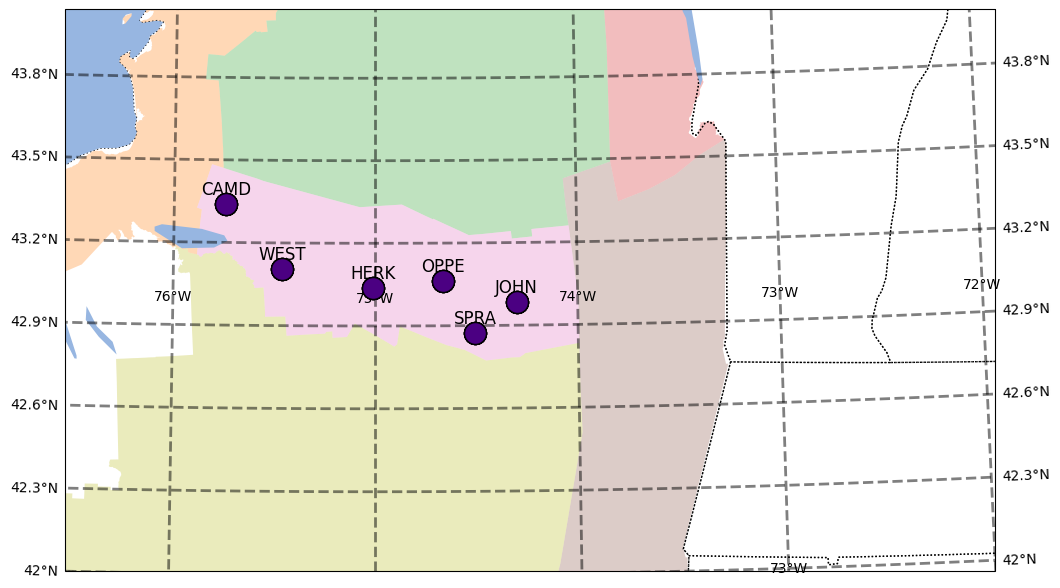

In [38]:
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np

colors = [
    "forestgreen",
    "olive",
    "goldenrod",
    "teal",
    "darkred",
    "indigo",
    "sienna",
    "darkorange",
    "royalblue",
    "deeppink",
    "violet",
]
j = 0

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(
    1,
    1,
    1,
    projection=ccrs.LambertConformal(
        central_longitude=-75.0, standard_parallels=(49, 77)
    ),
)

# Replace 'your_shapefile.shp' with the path to your shapefile
shapefile_path = '/home/aevans/nwp_bias/src/machine_learning/notebooks/data/GIS.OFFICIAL_CLIM_DIVISIONS.shp'

# Read the shapefile
gdf = gpd.read_file(shapefile_path)

# Load the boundaries of New York State (replace with your actual file path)
ny_state_boundaries_path = '/home/aevans/nwp_bias/src/landtype/data/State.shx'

# Read the shapefile and set the CRS explicitly
ny_state_boundaries_geo = gpd.read_file(ny_state_boundaries_path).to_crs(epsg=4326)

# Get the bounding box of New York State
ny_bbox = ny_state_boundaries_geo.total_bounds

# Filter the GeoDataFrame to include only polygons within New York State
gdf_filtered = gdf.cx[ny_bbox[0]:ny_bbox[2], ny_bbox[1]:ny_bbox[3]]
gdf_filtered = gdf_filtered.iloc[20:29]

# Create a categorical column for coloring
gdf_filtered['category'] = np.arange(len(gdf_filtered))

# Plot the shapefile with multiple colors based on the 'category' column
gdf_filtered.plot(ax=ax, transform=ccrs.PlateCarree(), column='category', cmap='tab10', alpha=0.3)

# Plot scatter points
for s in my_stations:
    print(s)
    # df = nysm_cats_df[nysm_cats_df["stid"] == s]
    ax.scatter(
        df_["lon [degrees]"],
        df_["lat [degrees]"],
        c=colors[j],
        s=250,
        edgecolors="black",
        transform=ccrs.PlateCarree(),
        zorder=10,
        label=s,
    )
    j += 1

# Set extent for the plot
ax.set_extent([-76.5, -72.0, 42., 44.], crs=ccrs.PlateCarree())

# Add map features
ax.add_feature(cfeature.BORDERS.with_scale("50m"), linestyle=":", zorder=1)
ax.add_feature(cfeature.STATES.with_scale("50m"), linestyle=":", zorder=1)
ax.add_feature(cfeature.LAKES.with_scale("50m"), zorder=1)
ax.gridlines(
    crs=ccrs.PlateCarree(),
    draw_labels=True,
    linewidth=2,
    color="black",
    alpha=0.5,
    linestyle="--",
)
ax.xticklabels_top = False
ax.ylabels_right = False

# Annotate scatter points with station IDs
for i, row in df_.iterrows():
    lon, lat = row['lon [degrees]'], row['lat [degrees]']
    ax.annotate(row['stid'], (lon, lat), textcoords="offset points", xytext=(0, 7), ha='center', fontsize=12, color='black', transform=ccrs.PlateCarree())

# Display the plot
plt.show()

In [16]:
# need 0 row 
gdf_filtered_1 = gdf_filtered.iloc[20:30]
gdf_filtered_1

Empty GeoDataFrame
Columns: [geometry, category]
Index: []

/home/aevans/miniconda3/lib/python3.9/site-packages/geopandas/plotting.py:693: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


<GeoAxes: >

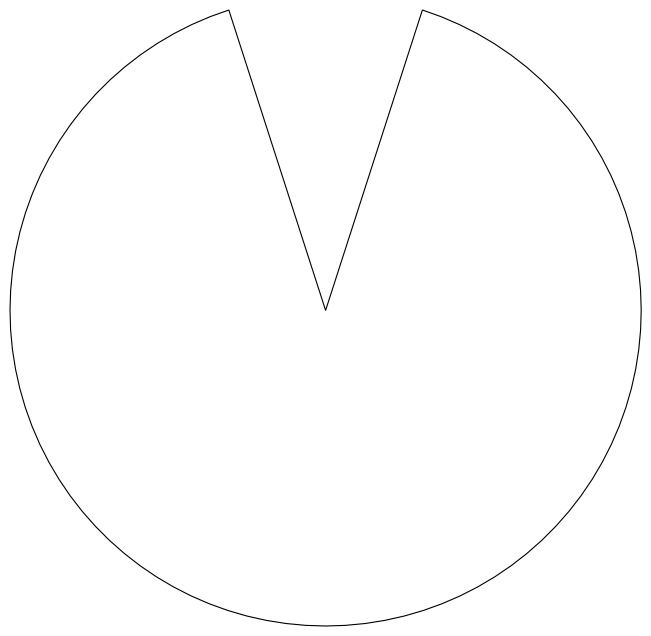

In [17]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(
    1,
    1,
    1,
    projection=ccrs.LambertConformal(
        central_longitude=-75.0, standard_parallels=(49, 77)
    ),
)
# Plot the shapefile with multiple colors based on the 'category' column
gdf_filtered_1.plot(ax=ax, transform=ccrs.PlateCarree(), column='category', cmap='gist_ncar', alpha=0.3)

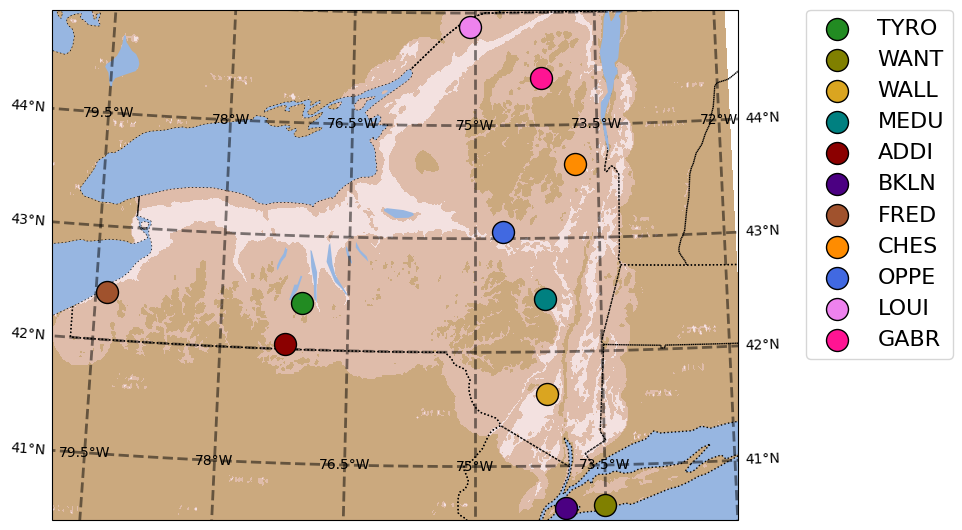

In [18]:
import rasterio
import cartopy.crs as crs
import cartopy.feature as cfeature

# Replace 'ny_dem.tif' with the path to your downloaded DEM file
ny_dem = "/home/aevans/nwp_bias/src/landtype/data/Map.tif"
colors = [
    "forestgreen",
    "olive",
    "goldenrod",
    "teal",
    "darkred",
    "indigo",
    "sienna",
    "darkorange",
    "royalblue",
    "violet",
    "deeppink",
]
j = 0

skip = 5

# Open the DEM file using rasterio
with rasterio.open(ny_dem) as src:
    elevation_data = src.read(
        1
    )  # Read the first band (assuming it's the elevation data)
    elevation_transform = src.transform
# Get the number of rows and columns in the elevation data
rows, cols = elevation_data.shape

# Create 2D arrays of coordinates using numpy.meshgrid
lons, lats = np.meshgrid(
    np.linspace(
        elevation_transform[2],
        elevation_transform[2] + cols * elevation_transform[0],
        cols,
    ),
    np.linspace(
        elevation_transform[5],
        elevation_transform[5] + rows * elevation_transform[4],
        rows,
    ),
)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(
    1,
    1,
    1,
    projection=crs.LambertConformal(
        central_longitude=-75.0, standard_parallels=(49, 77)
    ),
)

# ax.add_feature(cfeature.LAND.with_scale('50m'), zorder=3)
ax.add_feature(cfeature.OCEAN.with_scale("50m"), zorder=1)
ax.add_feature(cfeature.BORDERS.with_scale("50m"), linestyle=":", zorder=1)
ax.add_feature(cfeature.STATES.with_scale("50m"), linestyle=":", zorder=1)
ax.add_feature(cfeature.LAKES.with_scale("50m"), zorder=1)
ax.gridlines(
    crs=crs.PlateCarree(),
    draw_labels=True,
    linewidth=2,
    color="black",
    alpha=0.5,
    linestyle="--",
)
ax.xticklabels_top = False
ax.ylabels_right = False

plt.contourf(
    lons[::skip, ::skip],
    lats[::skip, ::skip],
    elevation_data[::skip, ::skip],
    transform=crs.PlateCarree(),
    levels=np.arange(0, 1500, 100),
    cmap="gist_earth_r",
    zorder=0,
)
for s in my_stations:
    df = nysm_cats_df[nysm_cats_df["stid"] == s]
    plt.scatter(
        df["lon [degrees]"],
        df["lat [degrees]"],
        c=colors[j],
        s=250,
        edgecolors="black",
        transform=crs.PlateCarree(),
        zorder=10,
        label=s,
    )
    j += 1

ax.set_extent([-79.82, -72.0, 40.48, 44.9])
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.legend(bbox_to_anchor=(1.1, 1), loc="upper left", borderaxespad=0, fontsize=16)

In [19]:
def load_nysm_data():
    # these parquet files are created by running "get_resampled_nysm_data.ipynb"
    nysm_path = "/home/aevans/nwp_bias/data/nysm/"

    nysm_1H = []
    for year in np.arange(2018, 2023):
        df = pd.read_parquet(f"{nysm_path}nysm_1H_obs_{year}.parquet")
        df.reset_index(inplace=True)
        nysm_1H.append(df)
    nysm_1H_obs = pd.concat(nysm_1H)
    nysm_1H_obs["snow_depth"] = nysm_1H_obs["snow_depth"].fillna(0)
    nysm_1H_obs.fillna(-999, inplace=True)
    return nysm_1H_obs

In [20]:
nysm_df = load_nysm_data()

In [21]:
stations = ['ANDE', 'BRON', 'BUFF', 'WALL']

In [22]:
nysm_df = nysm_df[nysm_df['station'].isin(stations)]

In [23]:
nysm_df = nysm_df[nysm_df['time_1H'] > datetime(2020, 8, 26, 0, 0, 0)]
nysm_df = nysm_df[nysm_df['time_1H'] < datetime(2020, 8, 29, 0, 0, 0)]

In [24]:
nysm_df

station             time_1H       lat        lon        elev  \
645457    ANDE 2020-08-26 01:00:00  42.18227 -74.801392  518.281982   
645458    ANDE 2020-08-26 02:00:00  42.18227 -74.801392  518.281982   
645459    ANDE 2020-08-26 03:00:00  42.18227 -74.801392  518.281982   
645460    ANDE 2020-08-26 04:00:00  42.18227 -74.801392  518.281982   
645461    ANDE 2020-08-26 05:00:00  42.18227 -74.801392  518.281982   
...        ...                 ...       ...        ...         ...   
728107    WALL 2020-08-28 19:00:00  41.63409 -74.153702  107.777000   
728108    WALL 2020-08-28 20:00:00  41.63409 -74.153702  107.777000   
728109    WALL 2020-08-28 21:00:00  41.63409 -74.153702  107.777000   
728110    WALL 2020-08-28 22:00:00  41.63409 -74.153702  107.777000   
728111    WALL 2020-08-28 23:00:00  41.63409 -74.153702  107.777000   

             tair       ta9m         td       relh        srad        pres  \
645457  19.756889  19.907049  13.027008  65.130562    0.000000  952.270020   
645458  17.998800  18.394911  12.556885  70.490692    0.000000  952.643616   
645459  17.499241  18.001640  12.470001  72.332321    0.000000  952.891479   
645460  15.985060  16.888050  12.477997  79.678047    0.000000  953.499573   
645461  14.302900  14.813890  12.405945  88.363113    0.000000  954.078430   
...           ...        ...        ...        ...         ...         ...   
728107  26.953150  26.341749  15.359436  49.040291  738.855896  996.966003   
728108  27.229151  26.871941  15.903839  49.964130  427.020325  996.488281   
728109  26.732670  26.624889  16.891693  54.785728  288.951385  996.161621   
728110  26.565420  26.582951  17.836273  58.733730  172.884872  995.858826   
728111  24.520981  25.234240  19.949005  75.684669   40.567478  996.063171   

              mslp  wspd_sonic_mean  wspd_sonic  wmax_sonic  wdir_sonic  \
645457  950.553955         1.866367    2.217769    4.655922  320.808289   
645458  951.279236         1.366093    1.202478    2.553112  359.896698   
645459  951.629578         1.089915    1.353689    2.761023   18.827009   
645460  952.548523         0.712364    0.705639    1.493588   44.277760   
645461  953.476318         1.277826    0.802879    2.010265  347.698486   
...            ...              ...         ...         ...         ...   
728107  996.692261         2.270061    3.865044    6.657077  278.013885   
728108  996.202209         1.782131    1.925714    3.658592  292.342499   
728109  995.895508         2.286123    2.362377    3.406289  234.579697   
728110  995.598999         1.079058    1.909167    3.366751  242.507004   
728111  995.889099         0.938115    0.789269    1.099092   82.995110   

        snow_depth  precip_total  
645457         0.0           0.0  
645458         0.0           0.0  
645459         0.0           0.0  
645460         0.0           0.0  
645461         0.0           0.0  
...            ...           ...  
728107         0.0           0.0  
728108         0.0           0.0  
728109         0.0           0.0  
728110         0.0           0.0  
728111         0.0           0.0  

[284 rows x 18 columns]

In [25]:
def plot_weather(df, var):
    fig, ax = plt.subplots(figsize=(12, 9))
    ax.set_xlabel(f"Time", fontsize = 18)
    ax.set_ylabel(f"{var} [m/s]", fontsize=18)
    ax.set_title(f"{df['station'].iloc[0]}", fontsize = 24)
    plt.ylim([0,20])

    plt.plot(df['time_1H'], df[var], c='red')

In [26]:
temp_1 = nysm_df[nysm_df['station'] == 'ANDE']
temp_2 = nysm_df[nysm_df['station'] == 'BUFF']
temp_3 = nysm_df[nysm_df['station'] == 'BRON']
temp_4 = nysm_df[nysm_df['station'] == 'WALL']

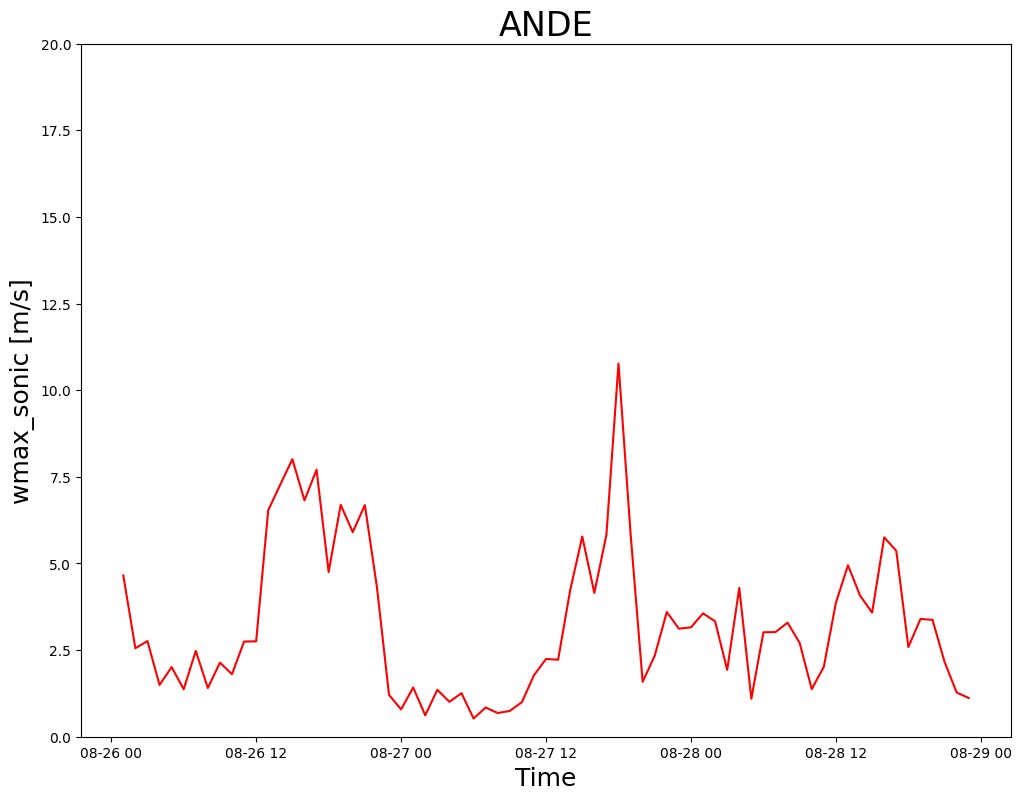

In [27]:
plot_weather(temp_1, 'wmax_sonic')

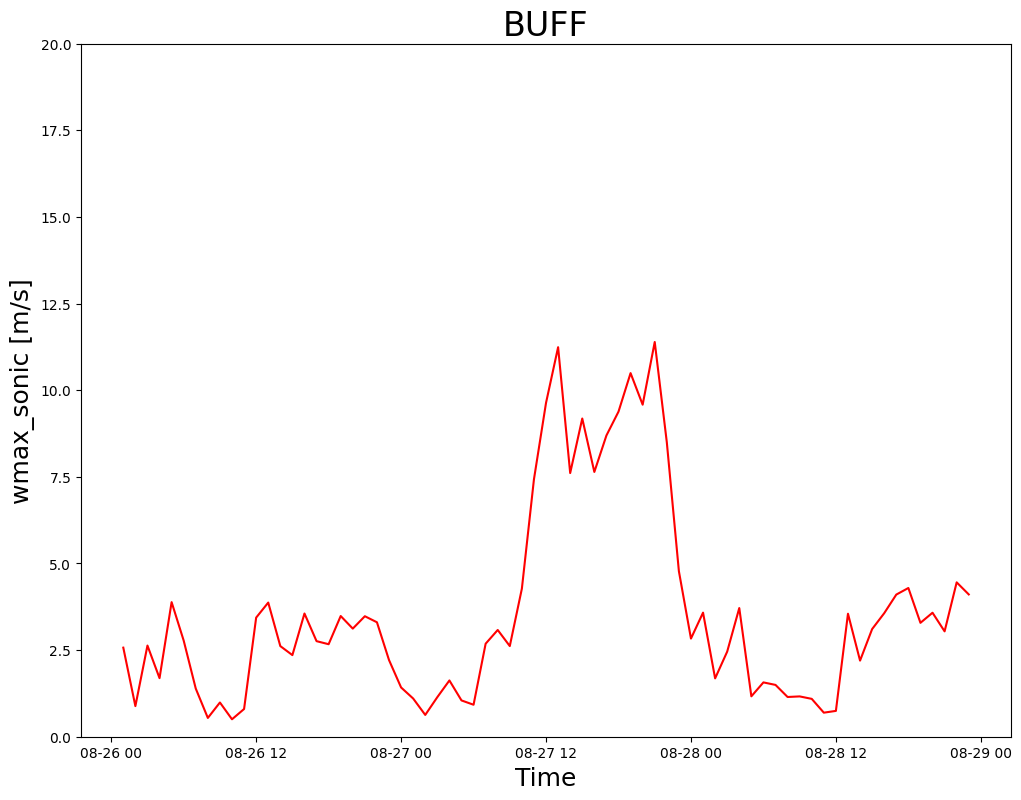

In [28]:
plot_weather(temp_2, 'wmax_sonic')

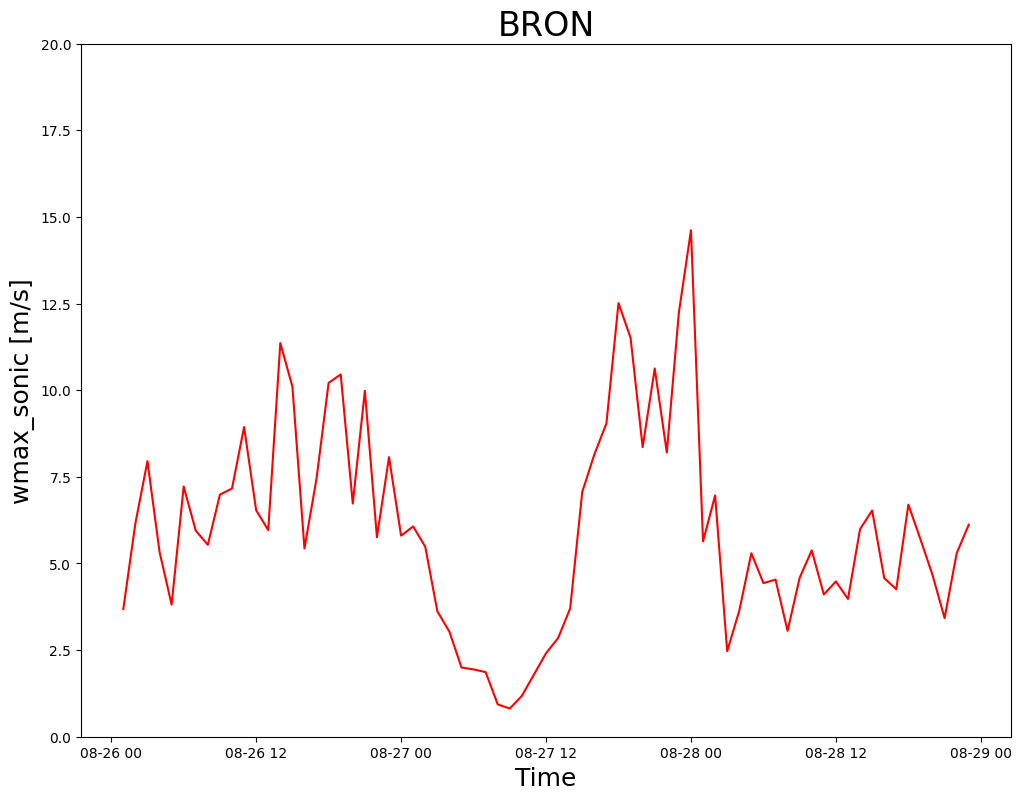

In [29]:
plot_weather(temp_3, 'wmax_sonic')

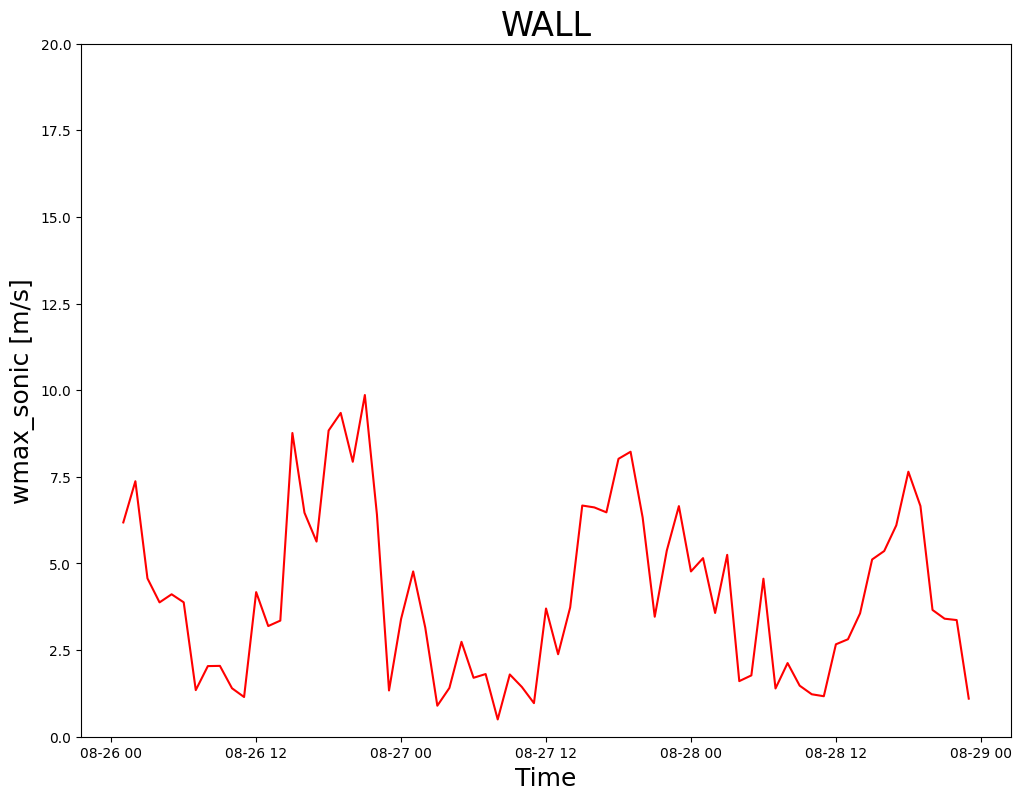

In [30]:
plot_weather(temp_4, 'wmax_sonic')

In [31]:
def read_hrrr_data():
    """
    Reads and concatenates parquet files containing forecast and error data for HRRR weather models
    for the years 2018 to 2022.

    Returns:
        pandas.DataFrame: of hrrr weather forecast information for each NYSM site.
    """

    years = ["2018", "2019", "2020", "2021", "2022"]
    savedir = "/home/aevans/ai2es/processed_data/HRRR/ny/"

    # create empty lists to hold dataframes for each model
    hrrr_fcast_and_error = []

    # loop over years and read in parquet files for each model
    for year in years:
        for month in np.arange(1, 13):
            str_month = str(month).zfill(2)
            if (
                os.path.exists(
                    f"{savedir}HRRR_{year}_{str_month}_direct_compare_to_nysm_sites_mask_water.parquet"
                )
                == True
            ):
                hrrr_fcast_and_error.append(
                    pd.read_parquet(
                        f"{savedir}HRRR_{year}_{str_month}_direct_compare_to_nysm_sites_mask_water.parquet"
                    )
                )
            else:
                continue

    # concatenate dataframes for each model
    hrrr_fcast_and_error_df = pd.concat(hrrr_fcast_and_error)
    hrrr_fcast_and_error_df = hrrr_fcast_and_error_df.reset_index().dropna()

    # return dataframes for each model
    return hrrr_fcast_and_error_df

In [32]:
# -*- coding: utf-8 -*-
import numpy as np
import pandas as pd


def format_climate_df(data_path):
    """
    Formats a climate data file located at the specified `data_path` into a pandas DataFrame.

    Args:
        data_path (str): The file path for the climate data file.

    Returns:
        pandas.DataFrame: A DataFrame containing the climate data, with the first column renamed to "year".
    """
    raw_index = np.loadtxt(f"{data_path}")
    cl_index = pd.DataFrame(raw_index)
    cl_index = cl_index.rename(columns={0: "year"})
    return cl_index

In [33]:
def groupby_month(df, col):
    df = df[df[col] > -999]
    GB = df.groupby([(df.valid_time.dt.year), (df.valid_time.dt.month)])[col].mean()
    the_list = GB.tolist()
    fig, ax = plt.subplots(figsize=(21, 6))
    plt.plot(the_list)
    ax.set_xticklabels([2018, 2019, 2020, 2021, 2022])
    ax.set_xticks(np.arange(0, len(the_list), int(len(the_list) / 5)))
    return the_list

In [34]:
def groupby_month_hrrr(df, col):
    df = df[df[col] > -999]
    GB = df.groupby([(df.time.dt.year), (df.time.dt.month)])[col].mean()
    the_list = GB.tolist()
    fig, ax = plt.subplots(figsize=(21, 6))
    plt.plot(the_list)
    ax.set_xticklabels([2018, 2019, 2020, 2021, 2022])
    ax.set_xticks(np.arange(0, 60, 12))
    return the_list

In [35]:
def anoms_detection_hrrr(df, means, col):
    anoms = []

    for i, _ in enumerate(df["time"]):
        t = df["time"].iloc[i]
        tair = df[col].iloc[i]
        dt_object = parse(str(t))
        year = dt_object.strftime("%Y")
        month = dt_object.strftime("%m")

        for m in np.arange(1, 13):
            if year == str(2018) and month == str(m).zfill(2):
                new_means = means[:12]
                anom = tair - new_means[m - 1]
                anoms.append(anom)
            if year == str(2019) and month == str(m).zfill(2):
                new_means = means[12:24]
                anom = tair - new_means[m - 1]
                anoms.append(anom)
            if year == str(2020) and month == str(m).zfill(2):
                new_means = means[24:36]
                anom = tair - new_means[m - 1]
                anoms.append(anom)
            if year == str(2021) and month == str(m).zfill(2):
                new_means = means[36:48]
                anom = tair - new_means[m - 1]
                anoms.append(anom)
            if year == str(2022) and month == str(m).zfill(2):
                new_means = means[48:60]
                anom = tair - new_means[m - 1]
                anoms.append(anom)

    fig, ax = plt.subplots(figsize=(21, 7))
    plt.plot(anoms, c="red")
    print(len(anoms))
    ax.set_xticklabels([2018, 2019, 2020, 2021, 2022])
    ax.set_xticks(np.arange(0, len(anoms), (len(anoms) / 5)))

In [36]:
def anoms_detection(df, means, col):
    times = []
    anoms = []

    df = df[df["valid_time"] > datetime(2022, 7, 20, 0, 0, 0)]
    df = df[df["valid_time"] < datetime(2022, 8, 11, 0, 0, 0)]

    for i, _ in enumerate(df["valid_time"]):
        t = df["valid_time"].iloc[i]
        tair = df[col].iloc[i]
        dt_object = parse(str(t))
        year = dt_object.strftime("%Y")
        month = dt_object.strftime("%m")

        for m in np.arange(1, 13):
            new_means = st.mean(means)
            anom = tair - new_means
            anoms.append(anom)
            times.append(t)

            # if year == str(2018) and month == str(m).zfill(2):
            #     new_means = means[:12]
            #     anom = tair - new_means[m-1]
            #     anoms.append(anom)
            # if year == str(2019) and month == str(m).zfill(2):
            #     new_means = means[12:24]
            #     anom = tair - new_means[m-1]
            #     anoms.append(anom)
            # if year == str(2020) and month == str(m).zfill(2):
            #     new_means = means[24:36]
            #     anom = tair - new_means[m-1]
            #     anoms.append(anom)
            # if year == str(2021) and month == str(m).zfill(2):
            #     new_means = means[36:48]
            #     anom = tair - new_means[m-1]
            #     anoms.append(anom)
            # if year == str(2022) and month == str(m).zfill(2):
            #     new_means = means[48:60]
            #     anom = tair - new_means[m-1]
            #     anoms.append(anom)

    fig, ax = plt.subplots(figsize=(21, 6))
    plt.plot(times, anoms, c="red")
    print(len(anoms))
    # ax.set_xticklabels([2018, 2019, 2020, 2021, 2022])
    # ax.set_xticks(np.arange(0, len(anoms), (len(anoms) / 5)))

In [37]:
# directory = sorted(os.listdir("/home/aevans/nwp_bias/src/correlation/data/indexes"))

# # years = ['2018', '2019', '2020', '2021', '2022']
# years = np.arange(2018, 2023)
# for d in directory:
#     if d != "csv":
#         path = f"/home/aevans/nwp_bias/src/correlation/data/indexes/{d}"
#         cldf = format_climate_df(path)
#         cldf = cldf[cldf["year"].isin(years)]
#         filename = d

#         # plot
#         parts = filename.split(".")
#         title = parts[0]
#         cldf = cldf.drop(columns=["year"])
#         y = []
#         for d, _ in enumerate(cldf[1]):
#             vals = cldf.iloc[d]
#             for v in vals:
#                 y.append(v)

#         x = np.arange(0, len(y))
#         print(len(y))

#         fig, ax = plt.subplots(figsize=(21, 7))
#         plt.plot(
#             x,
#             y,
#         )
#         plt.title(f"{title}")
#         ax.set_xticklabels([2018, 2019, 2020, 2021, 2022])
#         ax.set_xticks(np.arange(0, len(y), (len(y) / 5)))
#         ax.axhline(y=0, c="black")
#         ax.set_ylim(-3, 3)
#         plt.show()

In [38]:
hrrr_df = read_hrrr_data()
# hrrr_df = hrrr_df[hrrr_df["station"] == "OLEA"]
hrrr_df.keys()

Index(['valid_time', 'time', 'station', 'level_0', 'index', 'latitude',
       'longitude', 't2m', 'sh2', 'd2m', 'r2', 'u10', 'v10', 'tp', 'mslma',
       'orog', 'tcc', 'asnow', 'cape', 'dswrf', 'dlwrf', 'gh', 'u_total',
       'u_dir', 'lead time', 'lsm', 'new_tp'],
      dtype='object')

In [39]:
hrrr_df = hrrr_df[hrrr_df["station"] == "BKLN"]

In [40]:
hrrr_df
# Filter for summer months (assuming summer is June, July, and August)

valid_time                time station    level_0      index  \
4401    2018-01-01 02:00:00 2018-01-01 00:00:00    BKLN   65785170     134557   
4402    2018-01-01 03:00:00 2018-01-01 01:00:00    BKLN   65785171     340213   
4403    2018-01-01 04:00:00 2018-01-01 02:00:00    BKLN   65785172     545869   
4404    2018-01-01 05:00:00 2018-01-01 03:00:00    BKLN   65785173     751525   
4405    2018-01-01 06:00:00 2018-01-01 04:00:00    BKLN   65785174     957181   
...                     ...                 ...     ...        ...        ...   
5217661 2022-12-31 21:00:00 2022-12-31 19:00:00    BKLN  100091059  152114341   
5217662 2022-12-31 22:00:00 2022-12-31 20:00:00    BKLN  100091060  152319997   
5217663 2022-12-31 23:00:00 2022-12-31 21:00:00    BKLN  100091061  152525653   
5217664 2023-01-01 00:00:00 2022-12-31 22:00:00    BKLN  100091062  152731309   
5217665 2023-01-01 01:00:00 2022-12-31 23:00:00    BKLN  100091063  152936965   

          latitude  longitude        t2m      sh2        d2m  ...  asnow  \
4401     40.618318 -73.950544 -13.586401  0.00090 -18.062979  ...    0.0   
4402     40.618318 -73.950544 -15.011694  0.00087 -18.430716  ...    0.0   
4403     40.618318 -73.950544 -13.181189  0.00084 -18.856070  ...    0.0   
4404     40.618318 -73.950544 -15.501562  0.00083 -19.070868  ...    0.0   
4405     40.618318 -73.950544 -15.760291  0.00081 -19.258658  ...    0.0   
...            ...        ...        ...      ...        ...  ...    ...   
5217661  40.618318 -73.950544   9.595758  0.00735   9.539148  ...    0.0   
5217662  40.618318 -73.950544   9.368555  0.00723   9.270227  ...    0.0   
5217663  40.618318 -73.950544   9.178613  0.00716   9.127222  ...    0.0   
5217664  40.618318 -73.950544   9.329218  0.00721   9.246545  ...    0.0   
5217665  40.618318 -73.950544   9.039728  0.00710   8.976770  ...    0.0   

         cape  dswrf       dlwrf           gh   u_total       u_dir  \
4401      0.0    0.0  168.399994  5282.291992  1.674259  294.437225   
4402      0.0    0.0  170.500000  5278.519531  1.388052  294.943390   
4403      0.0    0.0  168.800003  5270.316895  1.096881  287.021820   
4404      0.0    0.0  167.399994  5268.104492  1.457086  290.155273   
4405      0.0    0.0  166.600006  5263.227539  1.607724  291.996429   
...       ...    ...         ...          ...       ...         ...   
5217661   0.0   13.4  369.799988  5678.194824  0.301278   61.964680   
5217662   0.0    0.0  369.100006  5670.233398  1.173380  166.343109   
5217663   0.0    0.0  364.500000  5664.935547  1.010009   84.188515   
5217664   0.0    0.0  364.500000  5666.607422  1.567695  141.588531   
5217665   0.0    0.0  365.100006  5647.147461  0.479187   72.592979   

         lead time  lsm  new_tp  
4401             2  1.0   0.000  
4402             2  1.0   0.000  
4403             2  1.0   0.000  
4404             2  1.0   0.000  
4405             2  1.0   0.000  
...            ...  ...     ...  
5217661          2  1.0   0.705  
5217662          2  1.0   0.000  
5217663          2  1.0   0.000  
5217664          2  1.0   0.000  
5217665          2  1.0   0.162  

[42095 rows x 27 columns]

In [41]:
nysm_df = load_nysm_data()

In [42]:
nysm_df["station"].unique()

array(['ADDI', 'ANDE', 'BATA', 'BEAC', 'BELD', 'BELL', 'BELM', 'BERK',
       'BING', 'BKLN', 'BRAN', 'BREW', 'BROC', 'BRON', 'BROO', 'BSPA',
       'BUFF', 'BURD', 'BURT', 'CAMD', 'CAPE', 'CHAZ', 'CHES', 'CINC',
       'CLAR', 'CLIF', 'CLYM', 'COBL', 'COHO', 'COLD', 'COPA', 'COPE',
       'CROG', 'CSQR', 'DELE', 'DEPO', 'DOVE', 'DUAN', 'EAUR', 'EDIN',
       'EDWA', 'ELDR', 'ELLE', 'ELMI', 'ESSX', 'FAYE', 'FRED', 'GABR',
       'GFAL', 'GFLD', 'GROT', 'GROV', 'HAMM', 'HARP', 'HARR', 'HART',
       'HERK', 'HFAL', 'ILAK', 'JOHN', 'JORD', 'KIND', 'LAUR', 'LOUI',
       'MALO', 'MANH', 'MEDI', 'MEDU', 'MORR', 'NBRA', 'NEWC', 'NHUD',
       'OLDF', 'OLEA', 'ONTA', 'OPPE', 'OSCE', 'OSWE', 'OTIS', 'OWEG',
       'PENN', 'PHIL', 'PISE', 'POTS', 'QUEE', 'RAND', 'RAQU', 'REDF',
       'REDH', 'ROXB', 'RUSH', 'SARA', 'SBRI', 'SCHA', 'SCHO', 'SCHU',
       'SCIP', 'SHER', 'SOME', 'SOUT', 'SPRA', 'SPRI', 'STAT', 'STEP',
       'SUFF', 'TANN', 'TICO', 'TULL', 'TUPP', 'TYRO', 'VOOR', 'WALL',
      

In [43]:
nysm_df = nysm_df[nysm_df["station"] == "BKLN"]

In [44]:
nysm_df = nysm_df[nysm_df["tair"] > -100]
nysm_df = nysm_df.rename(columns={"time_1H": "valid_time"})
nysm_df.dropna(inplace=True)

summer_df = nysm_df[
    (nysm_df["valid_time"].dt.month >= 5) & (nysm_df["valid_time"].dt.month <= 9)
]

In [45]:
# df = pd.read_parquet(
#     "/home/aevans/nwp_bias/src/machine_learning/data/lstm_eval_csvs/20231204/WANT/WANT_loss_0.05465654283761978_ml_output.parquet"
# )
# df = df.sort_index()

In [46]:
df

stid  number      name  lat [degrees]  lon [degrees]  elevation [m]  \
47  GABR     118  Gabriels       44.41742      -74.17867         535.72   

      county nearest_city state  distance_from_town [km]  \
47  Franklin     Gabriels    NY                      1.6   

   direction_from_town [degrees]  climate_division climate_division_name  wfo  \
47                             S                 3      Northern Plateau  BTV   

               commissioned  decommissioned  
47  2016-01-20 20:15:00 UTC             NaN

In [47]:
nysm_df[39490:40960]

station          valid_time        lat        lon       elev  \
554158    BKLN 2022-07-05 22:00:00  40.631763 -73.953674  33.220001   
554159    BKLN 2022-07-05 23:00:00  40.631763 -73.953674  33.220001   
554160    BKLN 2022-07-06 00:00:00  40.631763 -73.953674  33.220001   
554161    BKLN 2022-07-06 01:00:00  40.631763 -73.953674  33.220001   
554162    BKLN 2022-07-06 02:00:00  40.631763 -73.953674  33.220001   
...        ...                 ...        ...        ...        ...   
741408    BKLN 2022-09-05 00:00:00  40.631763 -73.953674  33.220001   
741409    BKLN 2022-09-05 01:00:00  40.631763 -73.953674  33.220001   
741410    BKLN 2022-09-05 02:00:00  40.631763 -73.953674  33.220001   
741411    BKLN 2022-09-05 03:00:00  40.631763 -73.953674  33.220001   
741412    BKLN 2022-09-05 04:00:00  40.631763 -73.953674  33.220001   

             tair       ta9m         td       relh       srad         pres  \
554158  22.288481  22.406111  19.327698  83.329979  43.664558  1008.502014   
554159  22.716801  22.835171  19.437500  81.744492  86.434311  1008.080017   
554160  22.650431  22.770300  19.338257  81.569221   5.399688  1007.726990   
554161  23.597500  23.735081  19.612610  78.350967   0.044975  1007.356018   
554162  23.640490  23.785740  18.828644  74.420731   0.000000  1007.671997   
...           ...        ...        ...        ...        ...          ...   
741408  24.970490  25.095020  21.132294  79.259216   0.000000  1014.176025   
741409  24.274811  24.399759  20.979675  81.857323   0.000000  1014.682983   
741410  24.819889  24.966619  20.158051  75.312027   0.000000  1014.489990   
741411  25.231689  25.386181  20.403992  74.610138   0.000000  1015.012024   
741412  23.353161  23.494370  21.072083  87.021553   0.000000  1015.000000   

               mslp  wspd_sonic_mean  wspd_sonic  wmax_sonic  wdir_sonic  \
554158  1008.692871         6.211191    6.710299   11.311080  165.406693   
554159  1008.264832         4.747146    6.109699    9.740513  164.221802   
554160  1007.912354         3.665466    4.110201    7.835389  167.478394   
554161  1007.527893         4.699697    5.570051    8.499187  178.914703   
554162  1007.843567         5.018734    3.934871    7.179218  184.814499   
...             ...              ...         ...         ...         ...   
741408  1014.333801         3.237588    3.548839    5.635180  150.774597   
741409  1014.850708         1.080890    2.068986    3.943397  208.646103   
741410  1014.650208         1.226153    1.168234    2.713284  166.277802   
741411  1015.167053         3.089571    2.109127    4.461220  202.405106   
741412  1015.180420         2.356149    2.934479    4.532975  271.309204   

        snow_depth  precip_total  
554158         0.0      0.000000  
554159         0.0      0.000000  
554160         0.0      0.000000  
554161         0.0      0.509995  
554162         0.0      0.000000  
...            ...           ...  
741408         0.0      0.000000  
741409         0.0      0.000000  
741410         0.0      0.000000  
741411         0.0      0.000000  
741412         0.0      0.490005  

[1470 rows x 18 columns]

In [48]:
# tcc_means = groupby_month_hrrr(hrrr_df, "tcc")

In [49]:
# anoms_detection_hrrr(hrrr_df, tcc_means, "tcc")

In [50]:
for k in summer_df.keys():
    print(k)

station
valid_time
lat
lon
elev
tair
ta9m
td
relh
srad
pres
mslp
wspd_sonic_mean
wspd_sonic
wmax_sonic
wdir_sonic
snow_depth
precip_total


/tmp/tmp.pWycJBnBmn/ipykernel_3266229/3865626854.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([2018, 2019, 2020, 2021, 2022])


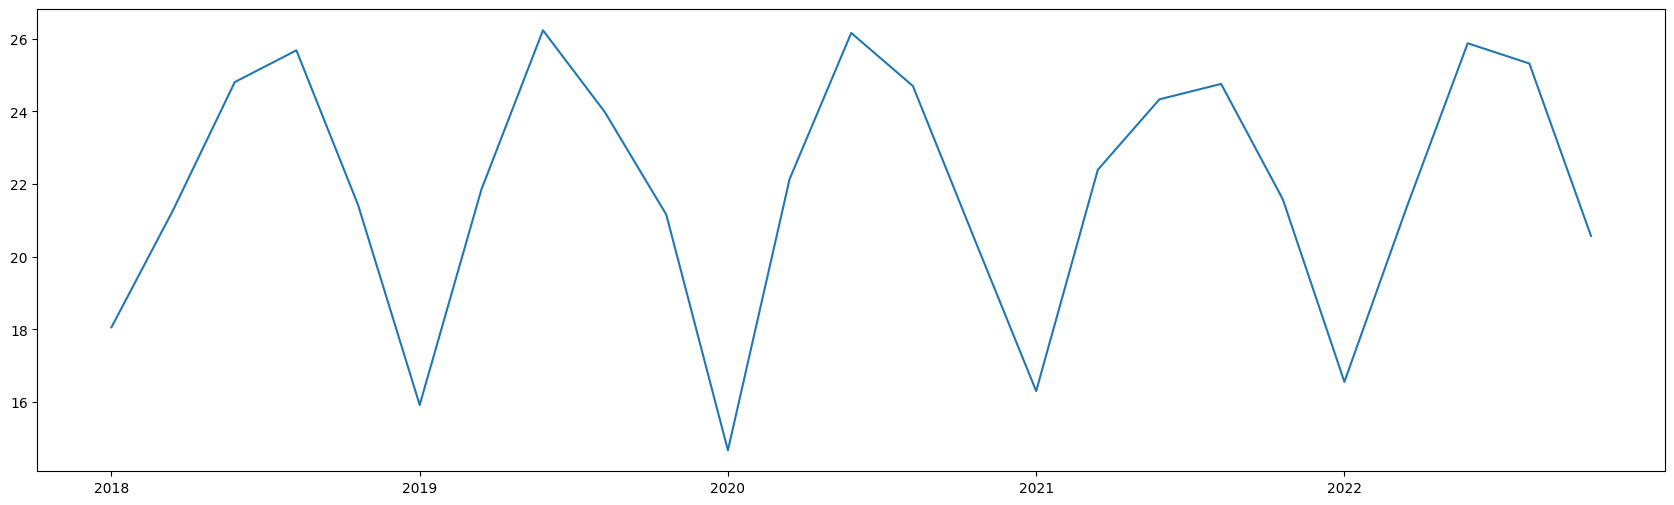

In [51]:
t2m_means = groupby_month(summer_df, "tair")

In [52]:
df = summer_df[summer_df["valid_time"] > datetime(2022, 7, 7, 0, 0, 0)]
df = df[df["valid_time"] < datetime(2022, 8, 15, 0, 0, 0)]

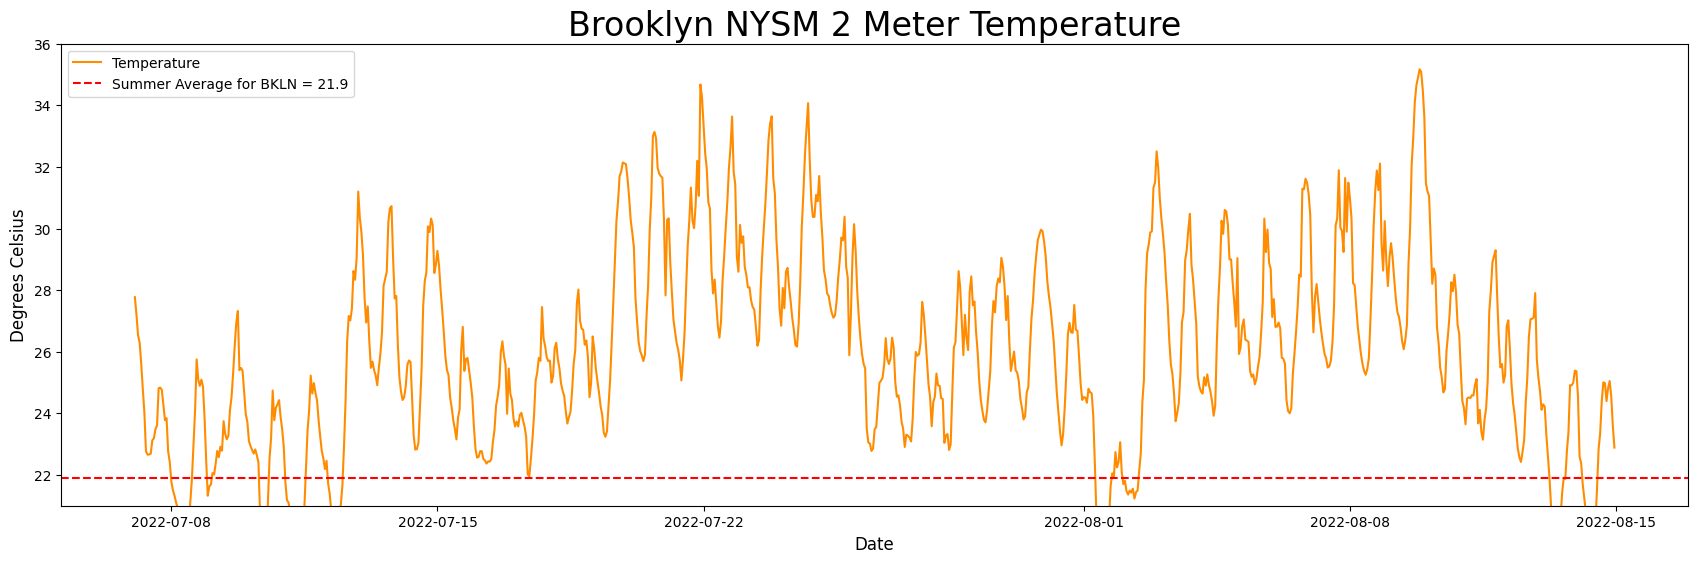

In [53]:
fig, ax = plt.subplots(figsize=(21, 6))

# Plotting the temperature data
ax.plot(df["valid_time"], df["tair"], color="darkorange", label="Temperature")

# Plotting the horizontal line for the mean temperature
mean_temp = st.mean(t2m_means)
ax.axhline(
    mean_temp,
    color="red",
    linestyle="--",
    label=f"Summer Average for BKLN = {round(mean_temp, 2)}",
)

# Adding legend
ax.legend()

ax.set_title("Brooklyn NYSM 2 Meter Temperature", fontsize=24)
ax.set_ylabel("Degrees Celsius", fontsize=12)
ax.set_xlabel("Date", fontsize=12)
ax.set_ylim(21, 36)

plt.show()

/tmp/tmp.pWycJBnBmn/ipykernel_3266229/3865626854.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([2018, 2019, 2020, 2021, 2022])


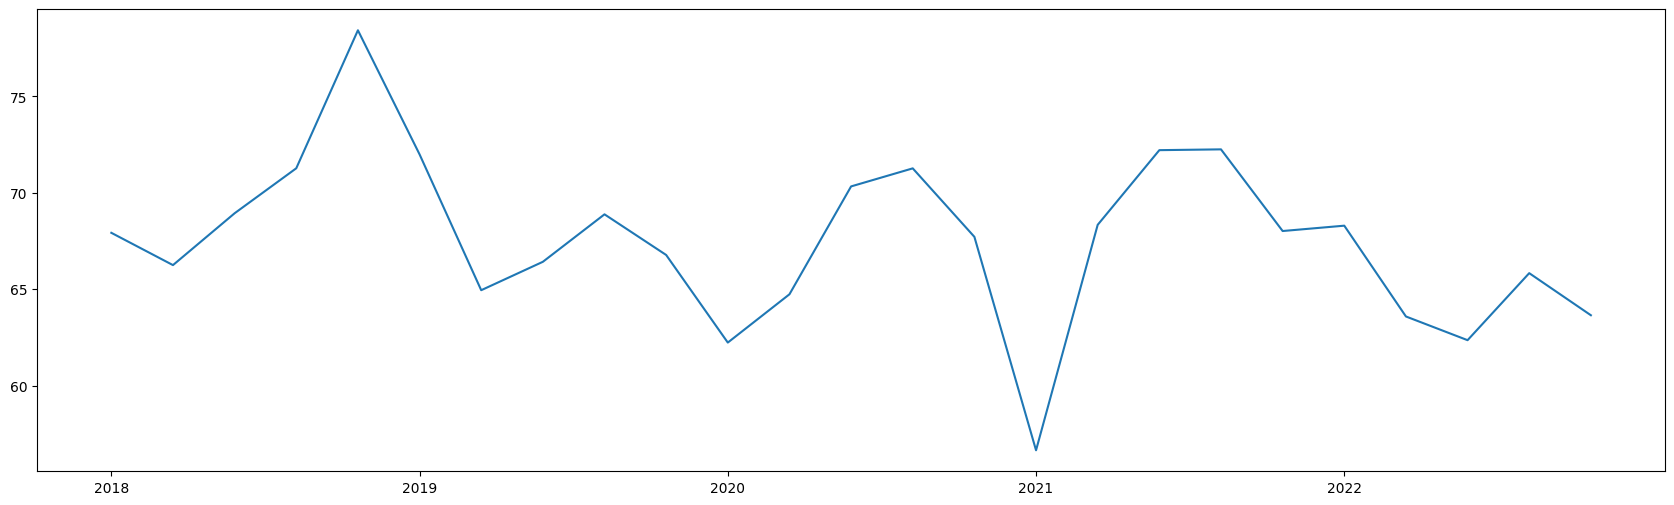

In [54]:
relh_means = groupby_month(summer_df, "relh")

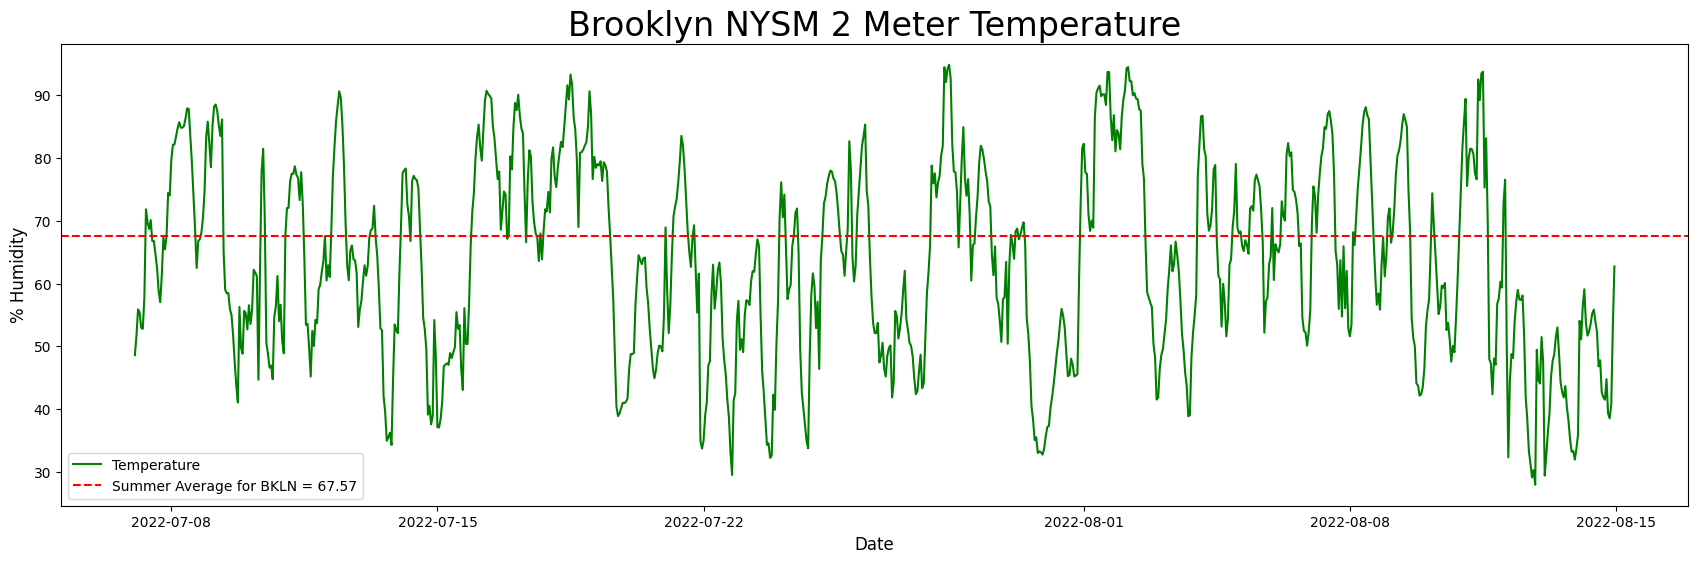

In [55]:
fig, ax = plt.subplots(figsize=(21, 6))

# Plotting the temperature data
ax.plot(df["valid_time"], df["relh"], color="green", label="Temperature")

# Plotting the horizontal line for the mean temperature
mean_temp = st.mean(relh_means)
ax.axhline(
    mean_temp,
    color="red",
    linestyle="--",
    label=f"Summer Average for BKLN = {round(mean_temp, 2)}",
)

# Adding legend
ax.legend()

ax.set_title("Brooklyn NYSM 2 Meter Temperature", fontsize=24)
ax.set_ylabel("% Humidity", fontsize=12)
ax.set_xlabel("Date", fontsize=12)
# ax.set_ylim(15, 40)

plt.show()

/tmp/tmp.pWycJBnBmn/ipykernel_3266229/3865626854.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([2018, 2019, 2020, 2021, 2022])


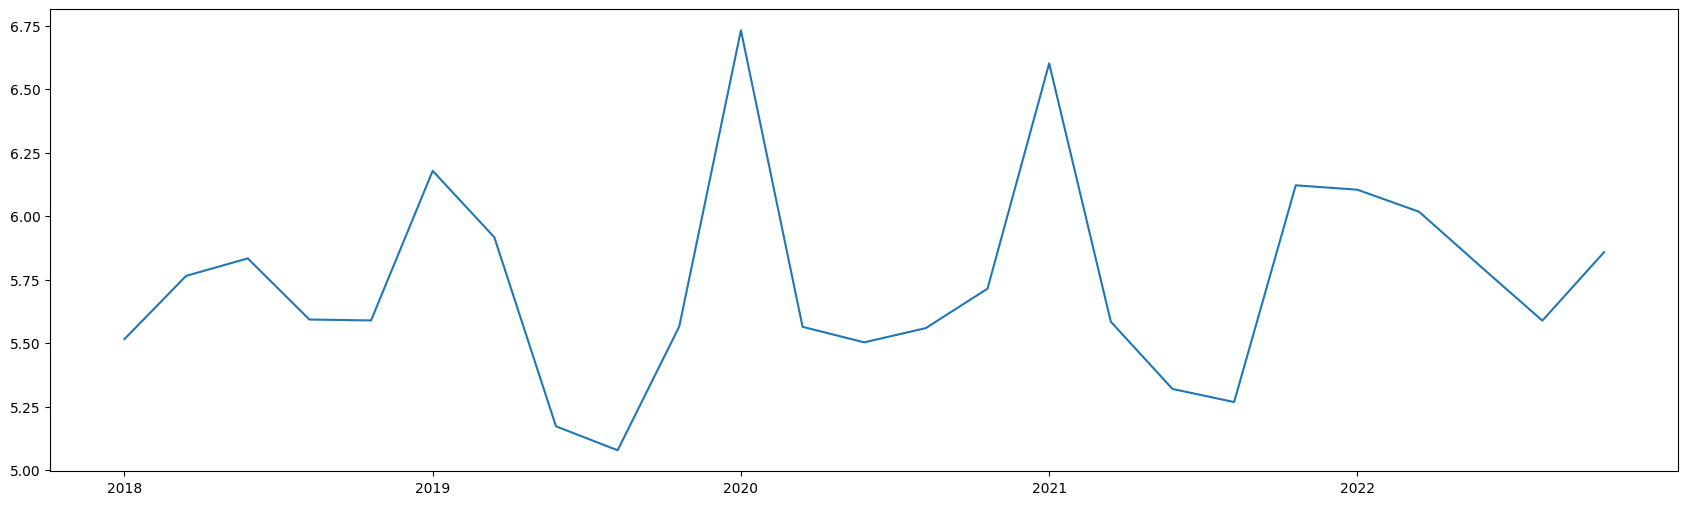

In [56]:
wind_means = groupby_month(summer_df, "wmax_sonic")

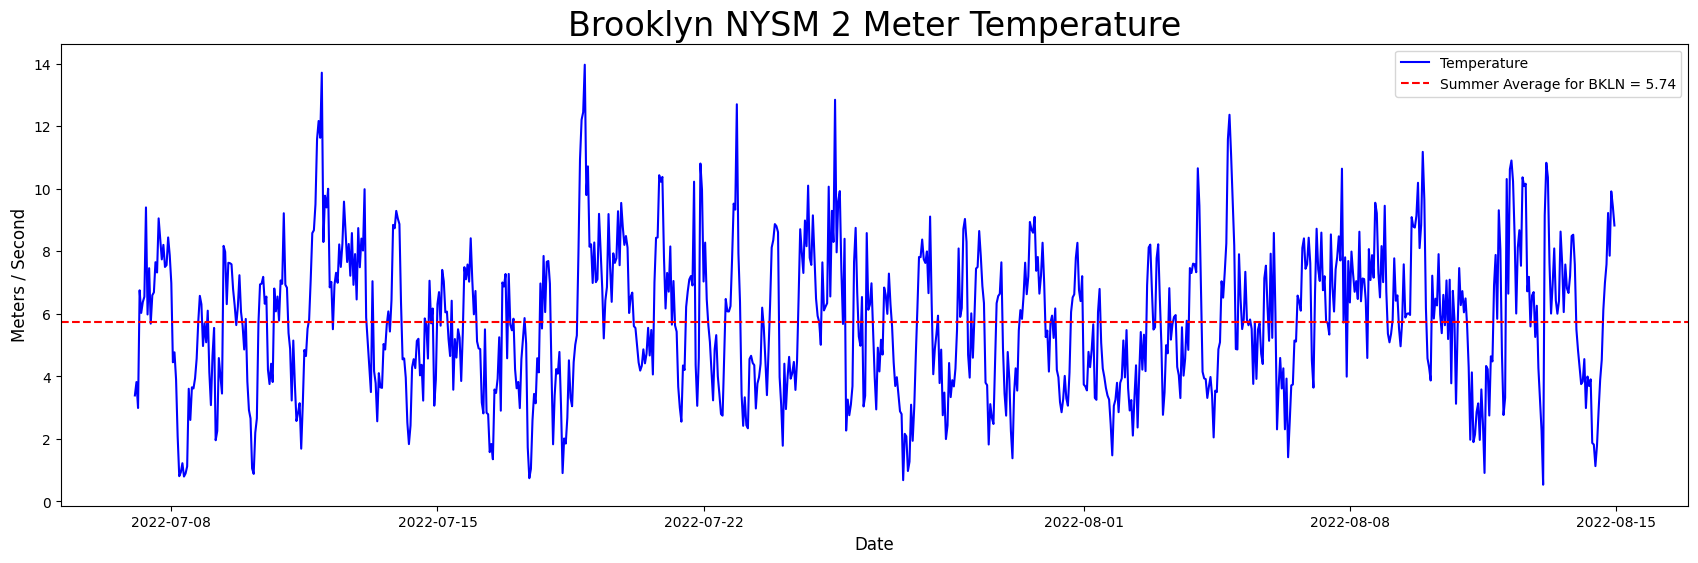

In [57]:
# Assuming you have 't2m_means' defined somewhere

fig, ax = plt.subplots(figsize=(21, 6))

# Plotting the temperature data
ax.plot(df["valid_time"], df["wmax_sonic"], color="blue", label="Temperature")

# Plotting the horizontal line for the mean temperature
mean_temp = st.mean(wind_means)
ax.axhline(
    mean_temp,
    color="red",
    linestyle="--",
    label=f"Summer Average for BKLN = {round(mean_temp, 2)}",
)

# Adding legend
ax.legend()

ax.set_title("Brooklyn NYSM 2 Meter Temperature", fontsize=24)
ax.set_ylabel("Meters / Second", fontsize=12)
ax.set_xlabel("Date", fontsize=12)
# ax.set_ylim(15, 40)

plt.show()

/tmp/tmp.pWycJBnBmn/ipykernel_3266229/3865626854.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([2018, 2019, 2020, 2021, 2022])


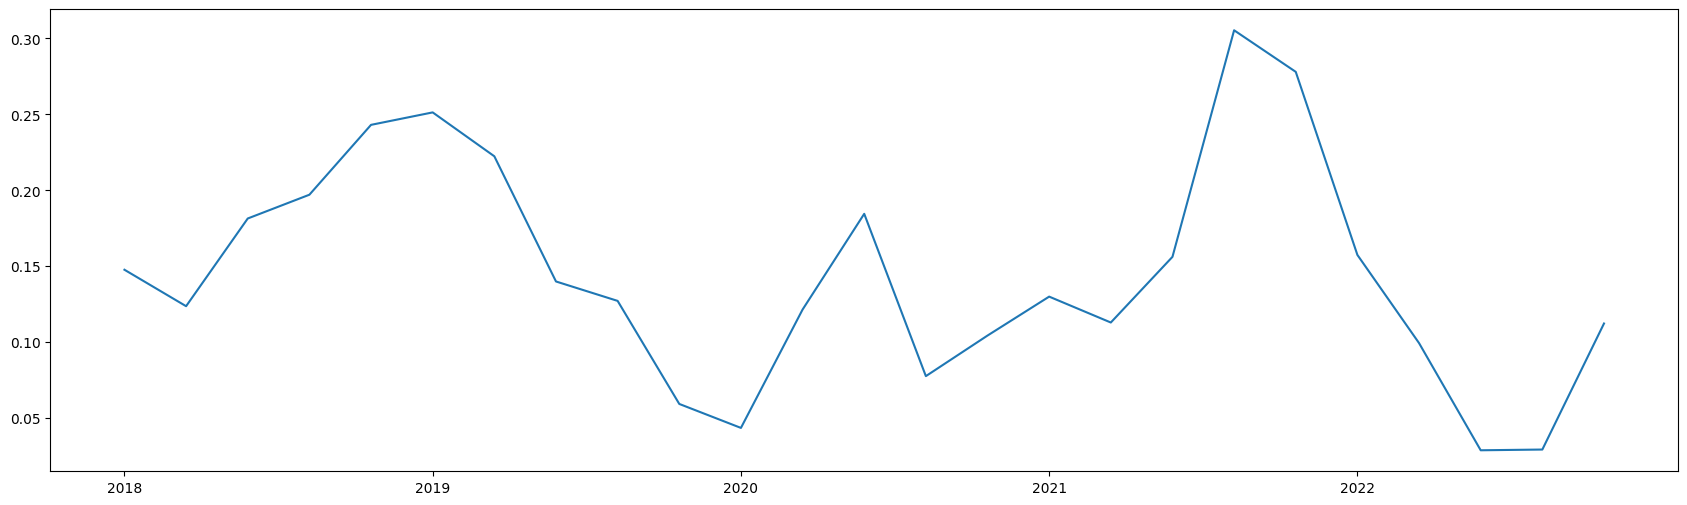

In [58]:
p_means = groupby_month(summer_df, "precip_total")

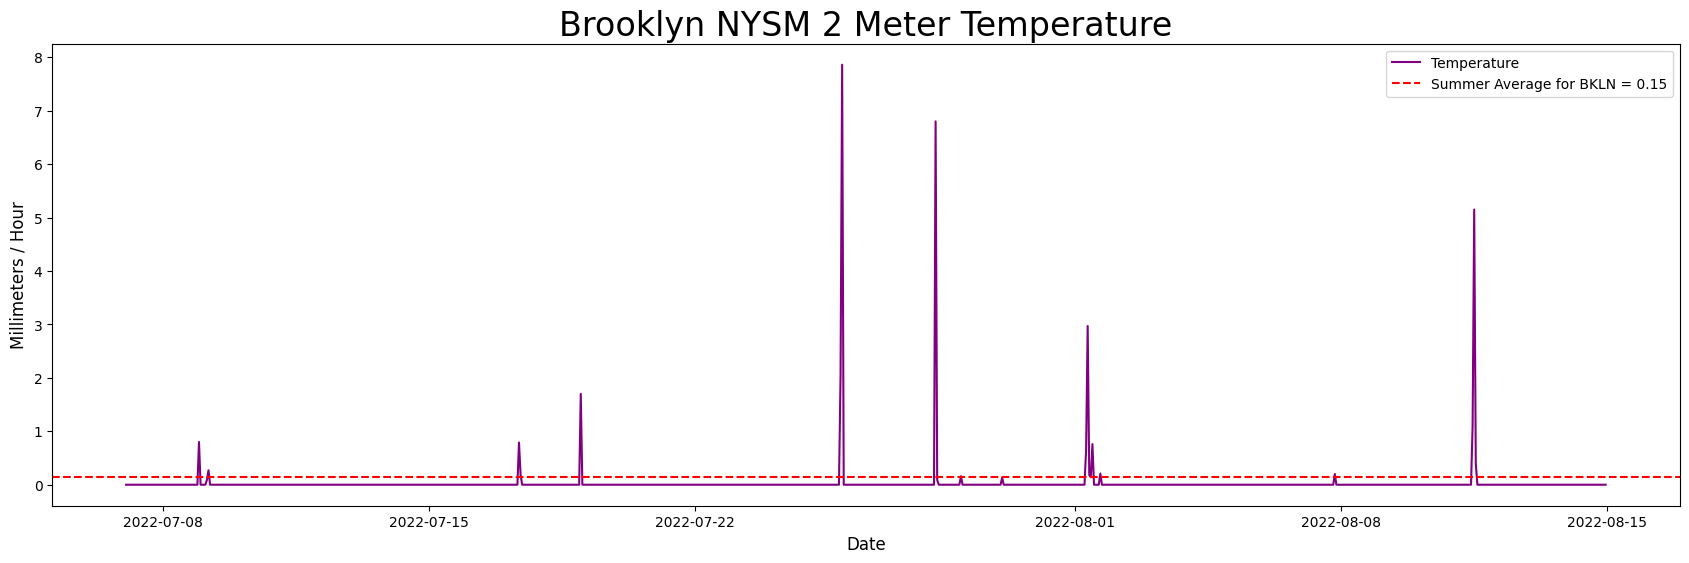

In [59]:
# Assuming you have 't2m_means' defined somewhere
fig, ax = plt.subplots(figsize=(21, 6))

# Plotting the temperature data
ax.plot(df["valid_time"], df["precip_total"], color="purple", label="Temperature")

# Plotting the horizontal line for the mean temperature
mean_temp = st.mean(p_means)
ax.axhline(
    mean_temp,
    color="red",
    linestyle="--",
    label=f"Summer Average for BKLN = {round(mean_temp, 2)}",
)

# Adding legend
ax.legend()

ax.set_title("Brooklyn NYSM 2 Meter Temperature", fontsize=24)
ax.set_ylabel("Millimeters / Hour", fontsize=12)
ax.set_xlabel("Date", fontsize=12)
# ax.set_ylim(15, 40)

plt.show()

In [60]:
def calc_hi(T, RH):
    _hi = (
        -42.379
        + 2.04901523 * T
        + 10.14333127 * RH
        - 0.22475541 * T * RH
        - 0.00683783 * T * T
        - 0.05481717 * RH * RH
        + 0.00122874 * T * T * RH
        + 0.00085282 * T * RH * RH
        - 0.00000199 * T * T * RH * RH
    )

    return _hi

In [61]:
def f_to_c(ls):
    new_ls = []
    for i in ls:
        new = (i - 32)*(5/9)
        new_ls.append(new)
    return new_ls

In [62]:
def heat_index(df):
    heat_index = []
    for i, _ in enumerate(df["valid_time"]):
        T = df["tair"].iloc[i]
        T = T * (9 / 5) + 32
        RH = df["relh"].iloc[i]

        hi = calc_hi(T, RH)
        heat_index.append(hi)
    new_heat = f_to_c(heat_index)
    return new_heat

In [63]:
heat_index = heat_index(df)

In [64]:
heat_index

[28.084685122019337,
 27.72695507605107,
 27.292863958888592,
 27.042086425368964,
 26.362981119419562,
 25.792315709651856,
 25.325602954831275,
 23.789708602248588,
 23.91833173493222,
 24.011331672327202,
 23.900270203312303,
 24.42790295506149,
 24.472717310589932,
 24.778842188674716,
 24.946919480209605,
 25.838830106702,
 25.84978691703927,
 25.793828464532567,
 25.28062025094891,
 24.938202945664845,
 24.89156067924199,
 23.52871539499295,
 23.32394909648212,
 22.091659582727363,
 21.4502805573964,
 21.317443592240785,
 20.901091803115758,
 20.488763119259147,
 20.14513138994304,
 20.364413710451164,
 20.32674064742978,
 20.237471378641725,
 19.80621011734687,
 19.255081023794215,
 19.382265181836086,
 20.934154824283418,
 22.22240585890734,
 23.769677643880737,
 25.06169018851471,
 26.741435475377806,
 26.093068924637745,
 25.88344453896667,
 26.098091829048645,
 25.825681976412806,
 24.51181862201076,
 22.141181702512903,
 20.56932675432915,
 21.501943685995872,
 22.208933612

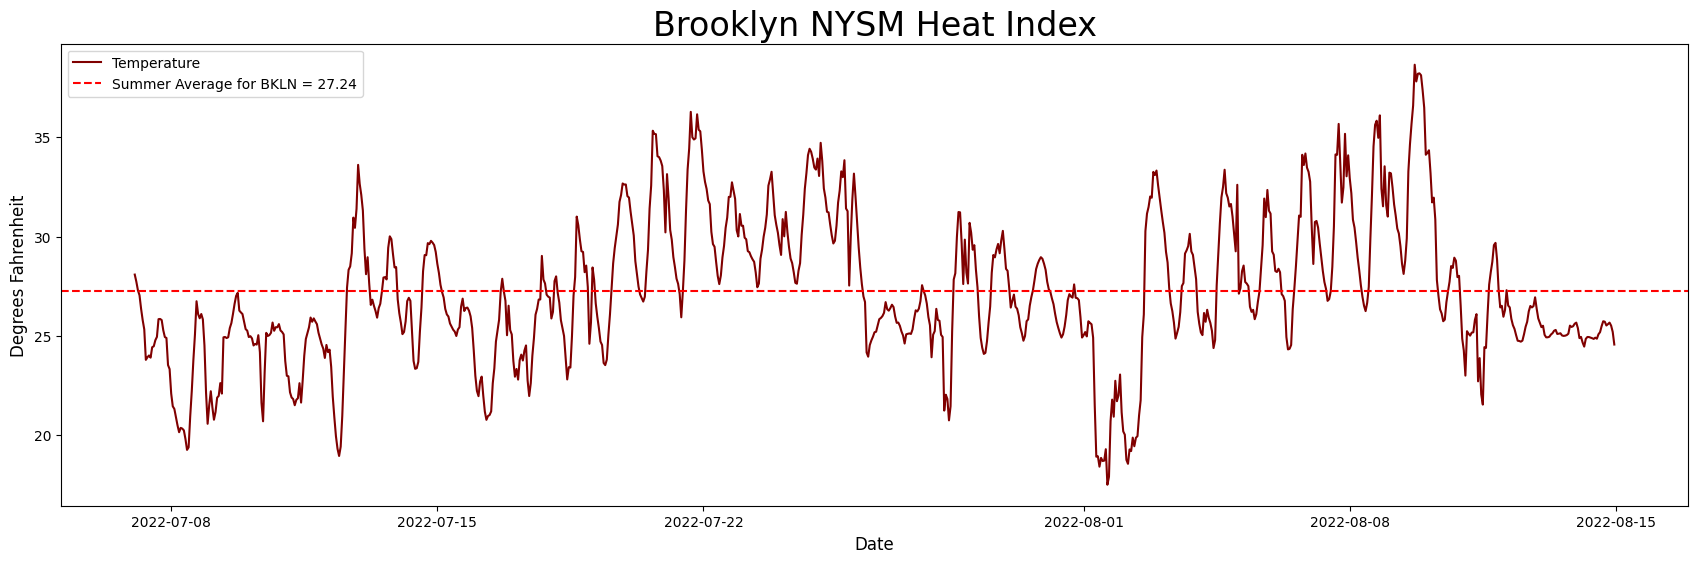

In [65]:
# Assuming you have 't2m_means' defined somewhere
fig, ax = plt.subplots(figsize=(21, 6))

# Plotting the temperature data
ax.plot(df["valid_time"], heat_index, color="maroon", label="Temperature")

# Plotting the horizontal line for the mean temperature
mean_temp = st.mean(heat_index)
ax.axhline(
    mean_temp,
    color="red",
    linestyle="--",
    label=f"Summer Average for BKLN = {round(mean_temp, 2)}",
)

# Adding legend
ax.legend()

ax.set_title("Brooklyn NYSM Heat Index", fontsize=24)
ax.set_ylabel("Degrees Fahrenheit", fontsize=12)
ax.set_xlabel("Date", fontsize=12)

plt.show()

In [66]:
elec_df = pd.read_csv(
    "/home/aevans/nwp_bias/data/model_data/nyc_electricity/nyc_elec_load_july_aug_2022.csv"
)

In [67]:
elec_df

Unnamed: 0           Time Stamp Time Zone    Name   PTID       Load
0               8  07/01/2022 00:00:00       EDT  N.Y.C.  61761  6375.8403
1              19  07/01/2022 00:05:00       EDT  N.Y.C.  61761  6314.5510
2              30  07/01/2022 00:10:00       EDT  N.Y.C.  61761  6299.3100
3              41  07/01/2022 00:15:00       EDT  N.Y.C.  61761  6271.8203
4              52  07/01/2022 00:20:00       EDT  N.Y.C.  61761  6241.6690
...           ...                  ...       ...     ...    ...        ...
18280        3297  08/31/2022 23:35:00       EDT  N.Y.C.  61761  6340.0186
18281        3308  08/31/2022 23:40:00       EDT  N.Y.C.  61761  6328.2490
18282        3319  08/31/2022 23:45:00       EDT  N.Y.C.  61761  6303.2373
18283        3330  08/31/2022 23:50:00       EDT  N.Y.C.  61761  6292.7754
18284        3341  08/31/2022 23:55:00       EDT  N.Y.C.  61761  6247.0107

[18285 rows x 6 columns]

In [68]:
date_format = "%m/%d/%Y %H:%M:%S"

dates = []

for i, _ in enumerate(elec_df["Time Stamp"]):
    date_string = elec_df["Time Stamp"].iloc[i]
    # Convert the string to a datetime object
    datetime_object = datetime.strptime(date_string, date_format)
    dates.append(datetime_object)

In [69]:
elec_df["valid_time"] = dates

In [70]:
elec_df

Unnamed: 0           Time Stamp Time Zone    Name   PTID       Load  \
0               8  07/01/2022 00:00:00       EDT  N.Y.C.  61761  6375.8403   
1              19  07/01/2022 00:05:00       EDT  N.Y.C.  61761  6314.5510   
2              30  07/01/2022 00:10:00       EDT  N.Y.C.  61761  6299.3100   
3              41  07/01/2022 00:15:00       EDT  N.Y.C.  61761  6271.8203   
4              52  07/01/2022 00:20:00       EDT  N.Y.C.  61761  6241.6690   
...           ...                  ...       ...     ...    ...        ...   
18280        3297  08/31/2022 23:35:00       EDT  N.Y.C.  61761  6340.0186   
18281        3308  08/31/2022 23:40:00       EDT  N.Y.C.  61761  6328.2490   
18282        3319  08/31/2022 23:45:00       EDT  N.Y.C.  61761  6303.2373   
18283        3330  08/31/2022 23:50:00       EDT  N.Y.C.  61761  6292.7754   
18284        3341  08/31/2022 23:55:00       EDT  N.Y.C.  61761  6247.0107   

               valid_time  
0     2022-07-01 00:00:00  
1     2022-07-01 00:05:00  
2     2022-07-01 00:10:00  
3     2022-07-01 00:15:00  
4     2022-07-01 00:20:00  
...                   ...  
18280 2022-08-31 23:35:00  
18281 2022-08-31 23:40:00  
18282 2022-08-31 23:45:00  
18283 2022-08-31 23:50:00  
18284 2022-08-31 23:55:00  

[18285 rows x 7 columns]

In [71]:
df2 = elec_df[elec_df["valid_time"] > datetime(2022, 7, 7, 0, 0, 0)]
df2 = df2[df2["valid_time"] < datetime(2022, 8, 15, 0, 0, 0)]

In [72]:
df2

Unnamed: 0           Time Stamp Time Zone    Name   PTID       Load  \
1769           19  07/07/2022 00:05:00       EDT  N.Y.C.  61761  6705.5490   
1770           30  07/07/2022 00:10:00       EDT  N.Y.C.  61761  6680.9463   
1771           41  07/07/2022 00:15:00       EDT  N.Y.C.  61761  6651.6797   
1772           52  07/07/2022 00:20:00       EDT  N.Y.C.  61761  6600.6367   
1773           63  07/07/2022 00:25:00       EDT  N.Y.C.  61761  6574.9404   
...           ...                  ...       ...     ...    ...        ...   
13288        3143  08/14/2022 23:35:00       EDT  N.Y.C.  61761  5824.8877   
13289        3154  08/14/2022 23:40:00       EDT  N.Y.C.  61761  5798.5440   
13290        3165  08/14/2022 23:45:00       EDT  N.Y.C.  61761  5806.3916   
13291        3176  08/14/2022 23:50:00       EDT  N.Y.C.  61761  5783.2803   
13292        3187  08/14/2022 23:55:00       EDT  N.Y.C.  61761  5750.0910   

               valid_time  
1769  2022-07-07 00:05:00  
1770  2022-07-07 00:10:00  
1771  2022-07-07 00:15:00  
1772  2022-07-07 00:20:00  
1773  2022-07-07 00:25:00  
...                   ...  
13288 2022-08-14 23:35:00  
13289 2022-08-14 23:40:00  
13290 2022-08-14 23:45:00  
13291 2022-08-14 23:50:00  
13292 2022-08-14 23:55:00  

[11524 rows x 7 columns]

In [73]:
# Sum up the 'value' column for each hour
hourly_sum = df2.groupby([(df2.valid_time.dt.hour)])["Load"].sum()

In [74]:
hourly_sum

valid_time
0     3.339869e+06
1     3.153169e+06
2     3.042086e+06
3     2.943021e+06
4     2.870916e+06
5     2.917992e+06
6     3.036457e+06
7     3.251455e+06
8     3.458343e+06
9     3.659600e+06
10    3.794298e+06
11    3.844669e+06
12    4.068456e+06
13    4.138049e+06
14    4.048219e+06
15    4.202676e+06
16    4.257024e+06
17    4.131691e+06
18    4.009136e+06
19    3.935339e+06
20    3.826434e+06
21    3.737342e+06
22    3.710824e+06
23    3.489839e+06
Name: Load, dtype: float64

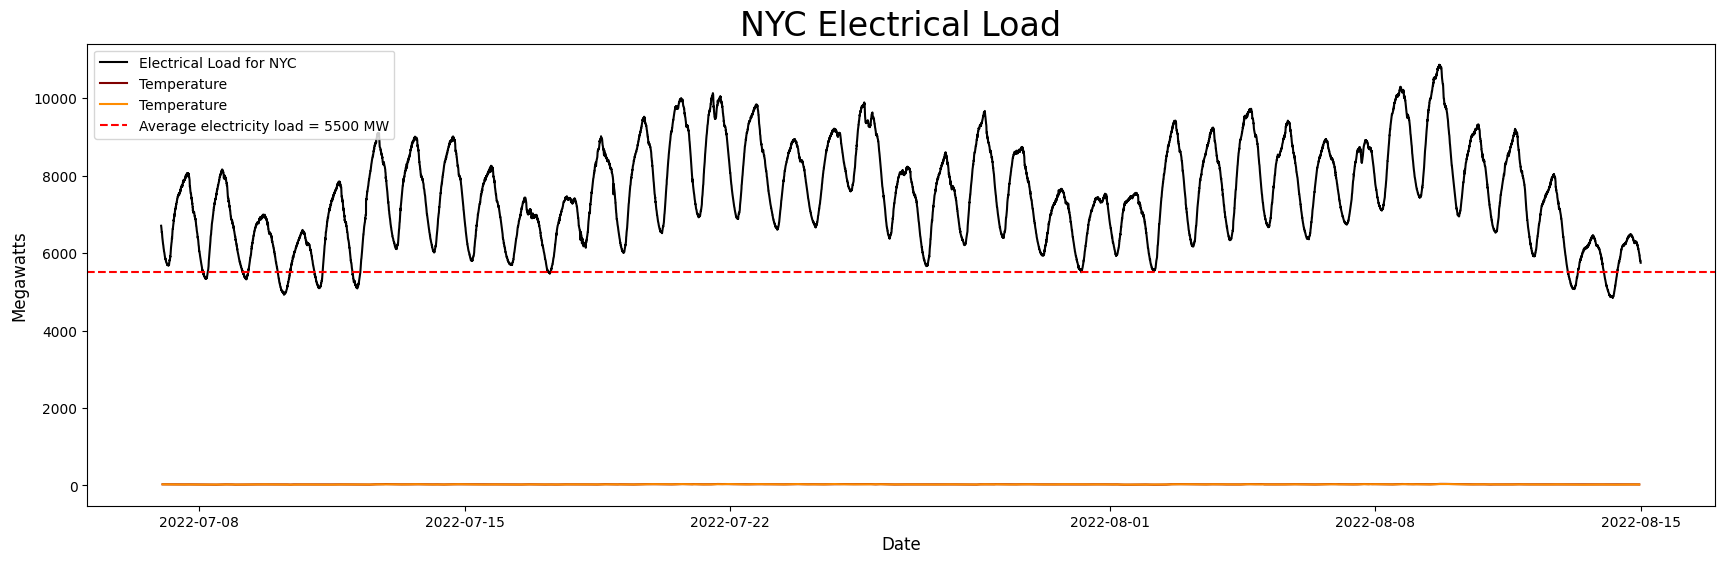

In [75]:
# Assuming you have 't2m_means' defined somewhere
fig, ax = plt.subplots(figsize=(21, 6))


# Plotting the temperature data
ax.plot(df2["valid_time"], df2["Load"], color="black", label="Electrical Load for NYC")
ax.plot(df["valid_time"], heat_index, color="maroon", label="Temperature")
# Plotting the temperature data
ax.plot(df["valid_time"], df["tair"], color="darkorange", label="Temperature")

# Plotting the horizontal line for the mean temperature
mean_temp = st.mean(heat_index)
ax.axhline(
    5500, color="red", linestyle="--", label=f"Average electricity load = 5500 MW"
)

# Adding legend
ax.legend()

ax.set_title("NYC Electrical Load", fontsize=24)
ax.set_ylabel("Megawatts", fontsize=12)
ax.set_xlabel("Date", fontsize=12)
# ax.set_ylim(80, 105)

plt.show()

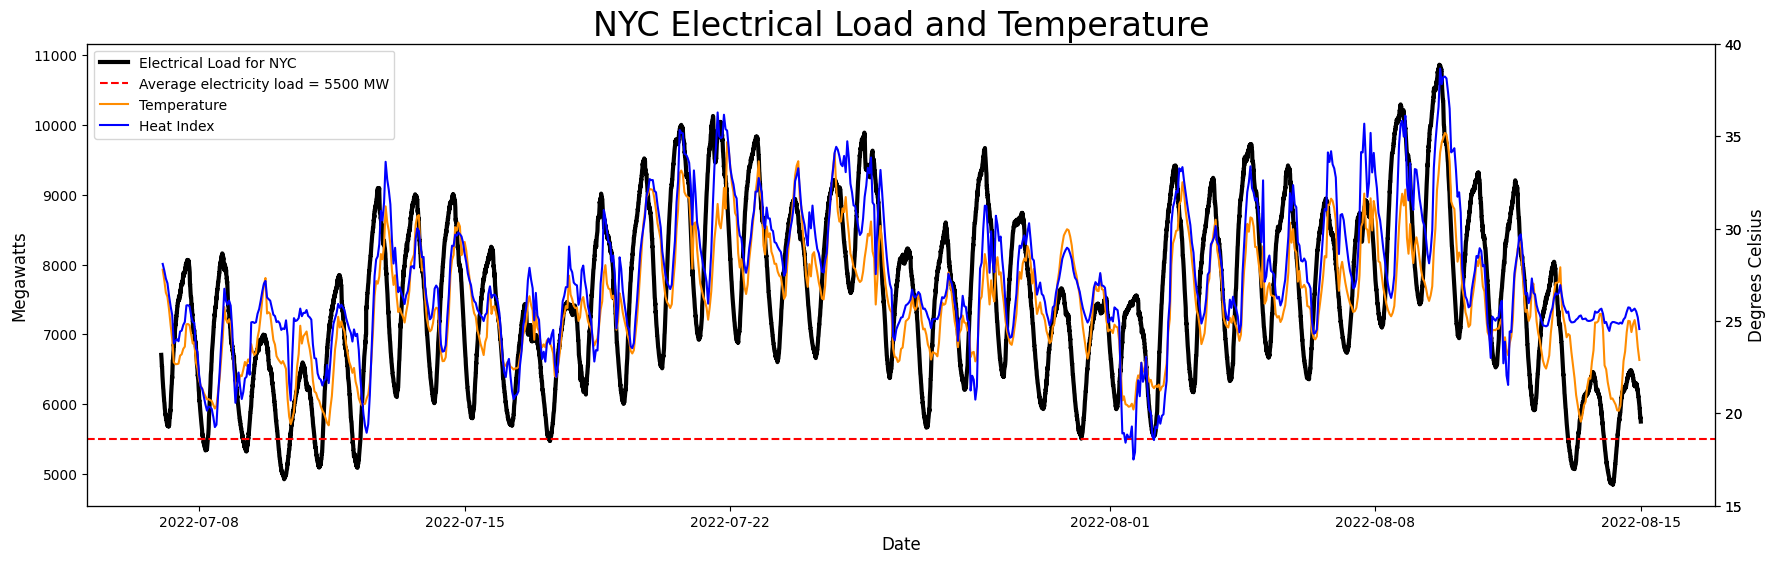

In [76]:
import matplotlib.pyplot as plt
import pandas as pd
import statistics as st

# Assuming you have 't2m_means' and 'df2' defined somewhere
fig, ax = plt.subplots(figsize=(21, 6))

# Plotting the temperature data on the primary y-axis
ax.plot(df2["valid_time"], df2["Load"], color="black", label="Electrical Load for NYC", linewidth=3)
ax.set_ylabel("Megawatts", fontsize=12)

# Creating a second y-axis
ax2 = ax.twinx()

# Plotting the first temperature data on the second y-axis
ax2.plot(df["valid_time"], df["tair"], color="darkorange", label="Temperature")
ax2.set_ylabel("Degrees Celsius", fontsize=12)
# Set the y-axis limits for ax2
ax2.set_ylim(ymin=15, ymax=40)

# Creating a third y-axis
ax3 = ax.twinx()

# Plotting the second temperature data on the third y-axis
ax3.plot(df["valid_time"], heat_index, color="blue", label="Heat Index")
ax3.set_ylim(ymin=15, ymax=40)


ax.axhline(
    5500, color="red", linestyle="--", label=f"Average electricity load = 5500 MW"
)

# Adding legend
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines3, labels3 = ax3.get_legend_handles_labels()
ax3.legend(lines + lines2 + lines3, labels + labels2 + labels3, loc='upper left')

ax.set_title("NYC Electrical Load and Temperature", fontsize=24)
ax.set_xlabel("Date", fontsize=12)

plt.show()


/tmp/tmp.pWycJBnBmn/ipykernel_3266229/3865626854.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([2018, 2019, 2020, 2021, 2022])


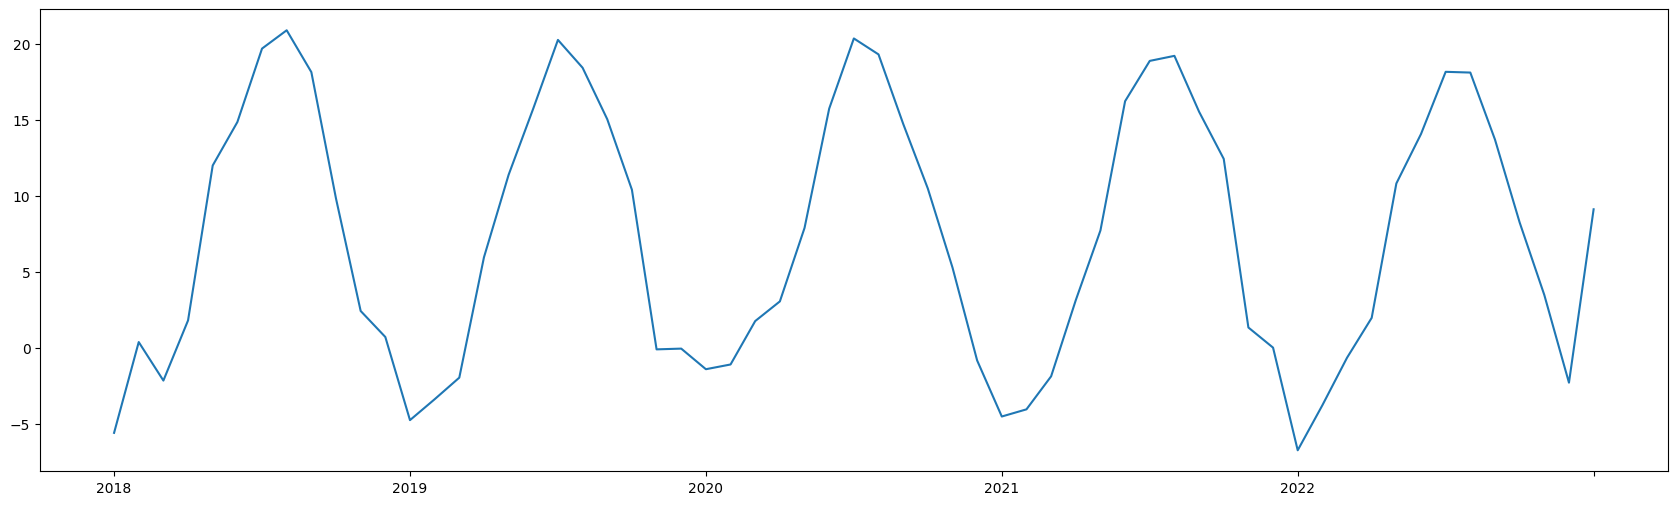

In [77]:
td_means = groupby_month(hrrr_df, "d2m")

6324


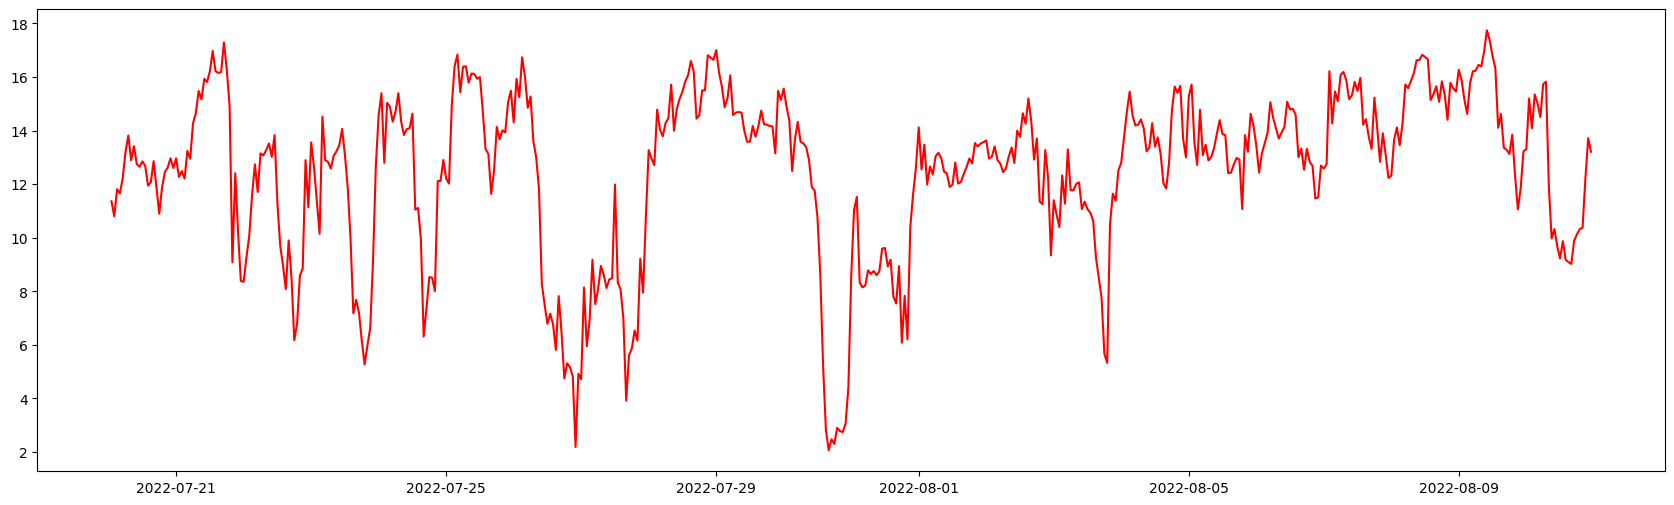

In [78]:
anoms_td = anoms_detection(hrrr_df, td_means, "d2m")

/tmp/tmp.pWycJBnBmn/ipykernel_3266229/3865626854.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([2018, 2019, 2020, 2021, 2022])


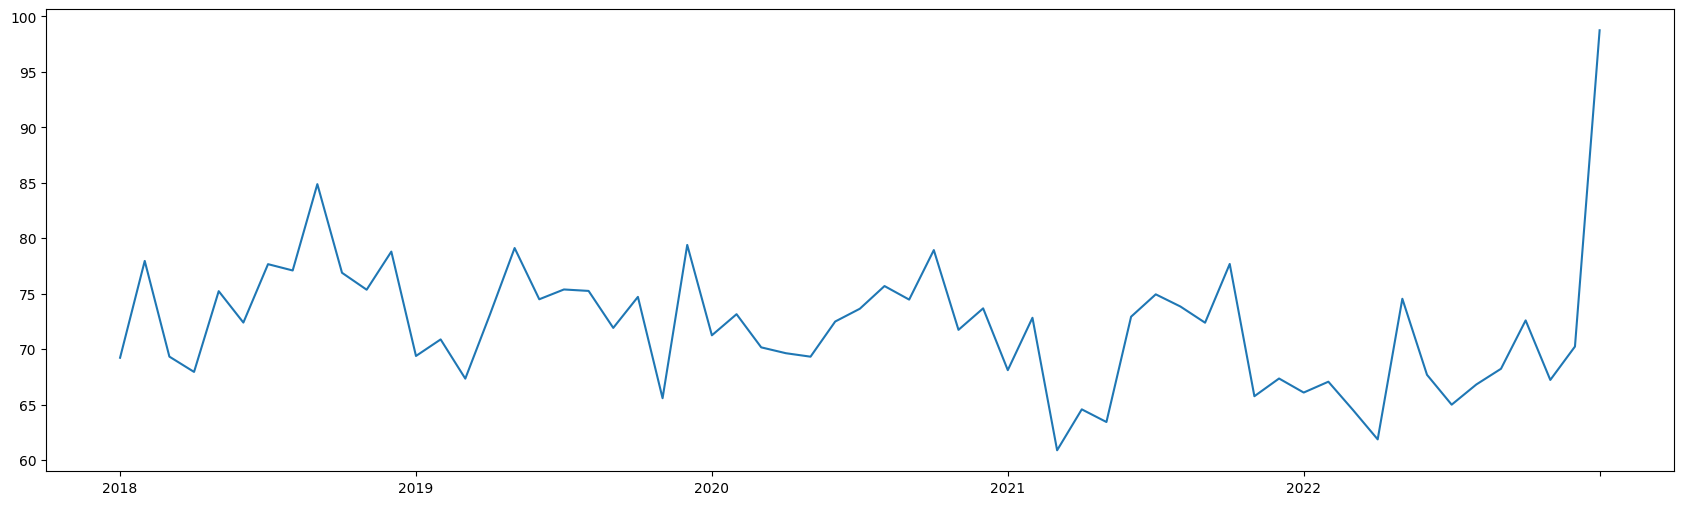

In [79]:
relh_means = groupby_month(hrrr_df, "r2")

6324


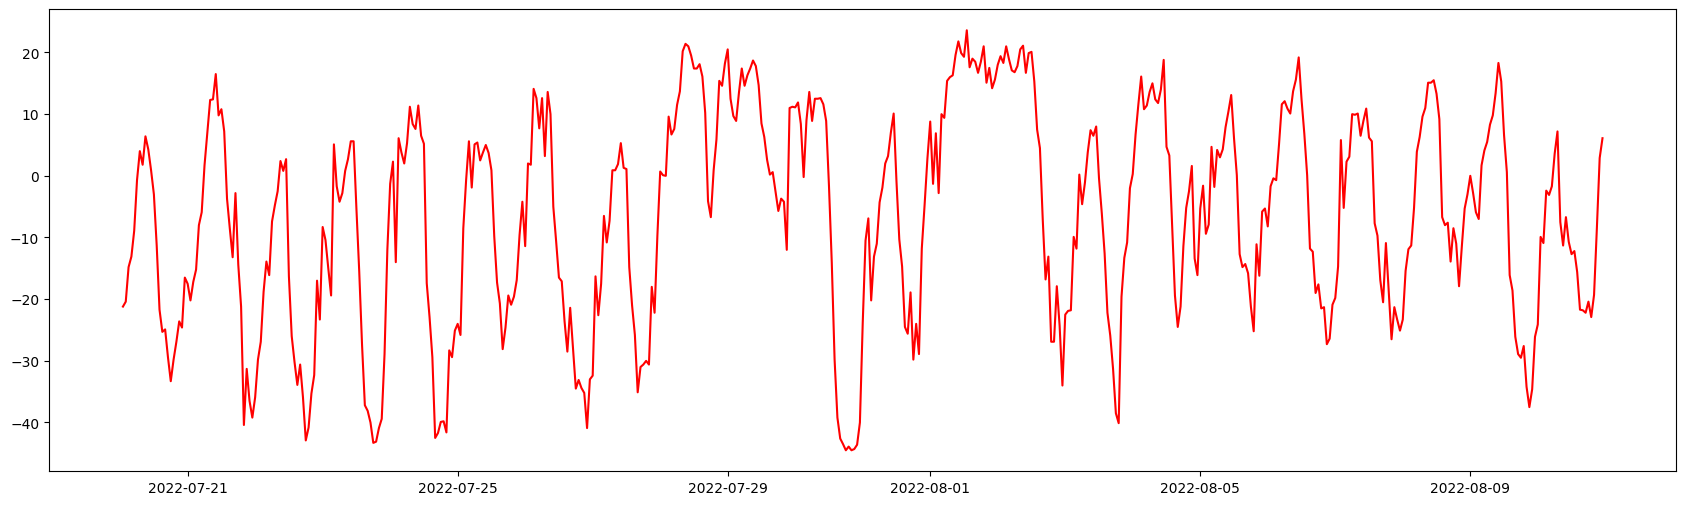

In [80]:
anoms_detection(hrrr_df, relh_means, "r2")

/tmp/tmp.pWycJBnBmn/ipykernel_3266229/3865626854.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([2018, 2019, 2020, 2021, 2022])


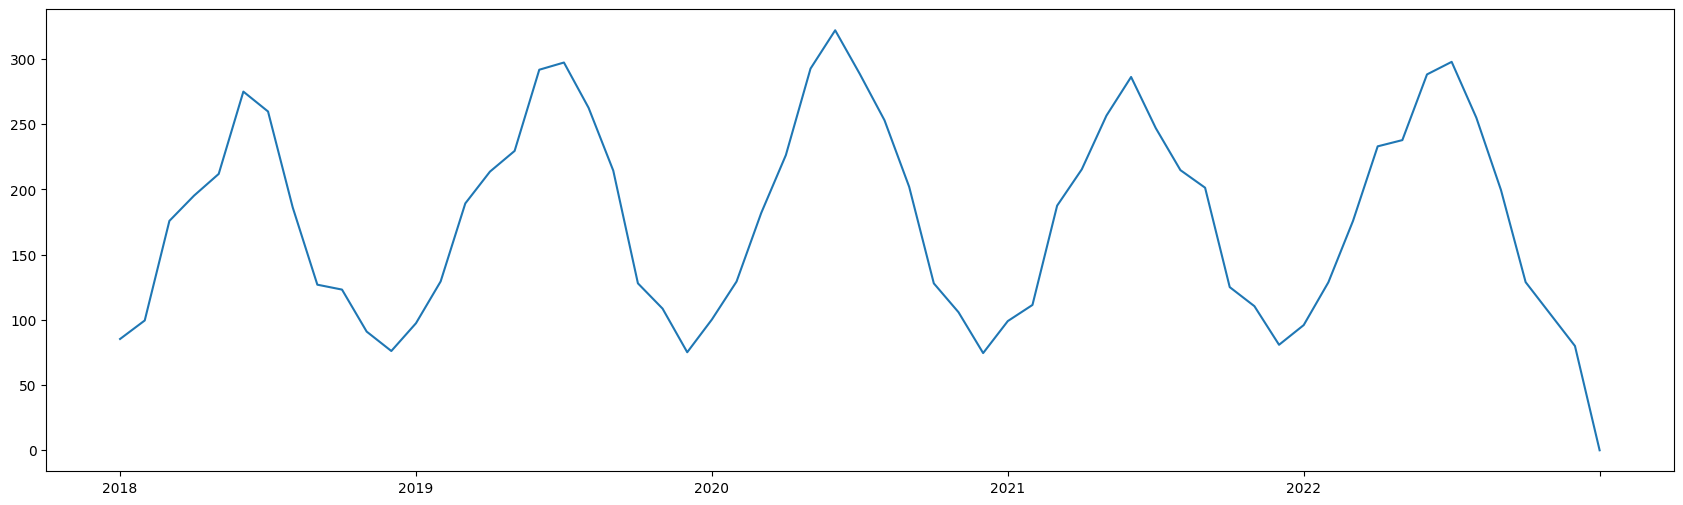

In [81]:
srad_means = groupby_month(hrrr_df, "dswrf")

6324


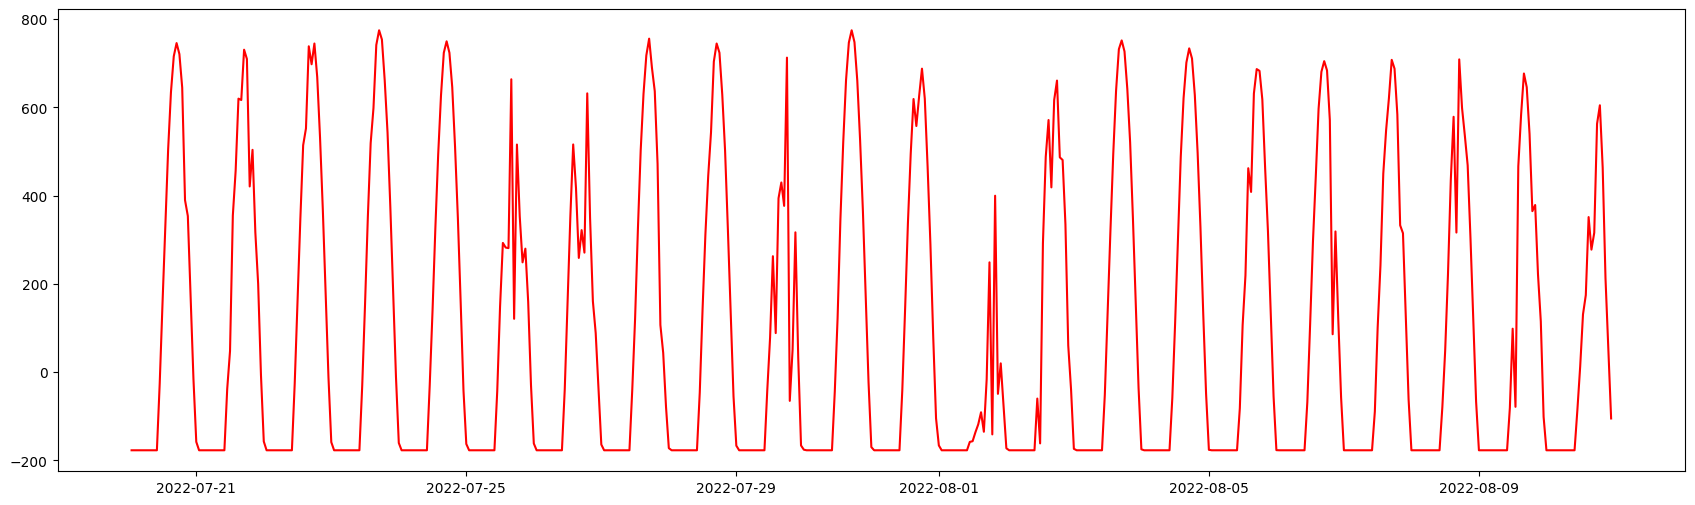

In [82]:
anoms_detection(hrrr_df, srad_means, "dswrf")

/tmp/tmp.pWycJBnBmn/ipykernel_3266229/3865626854.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([2018, 2019, 2020, 2021, 2022])


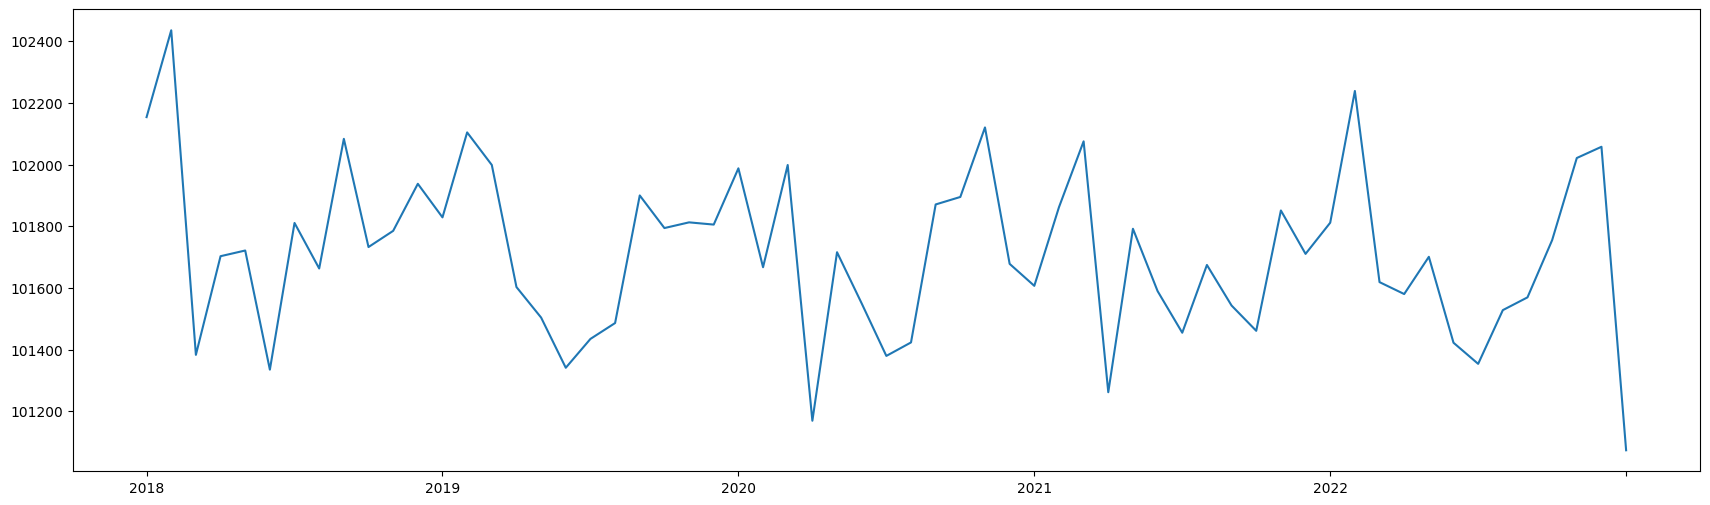

In [83]:
pres_means = groupby_month(hrrr_df, "mslma")

6324


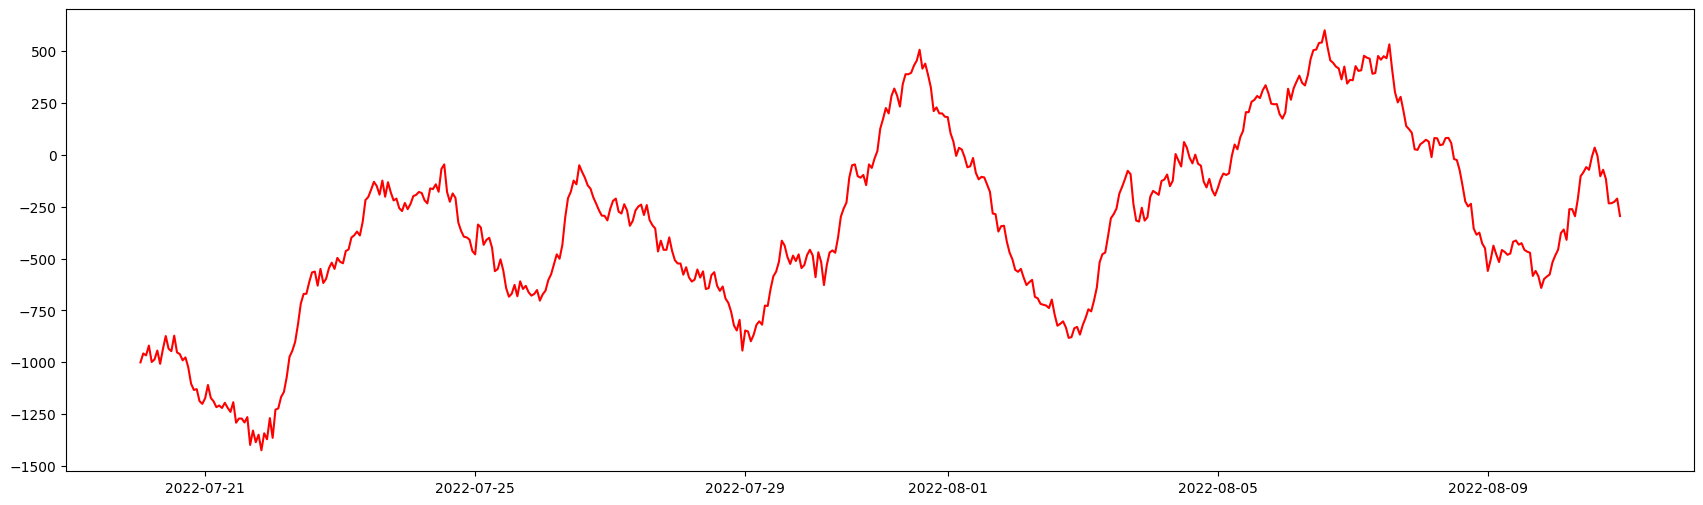

In [84]:
anoms_detection(hrrr_df, pres_means, "mslma")

/tmp/tmp.pWycJBnBmn/ipykernel_3266229/3865626854.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([2018, 2019, 2020, 2021, 2022])


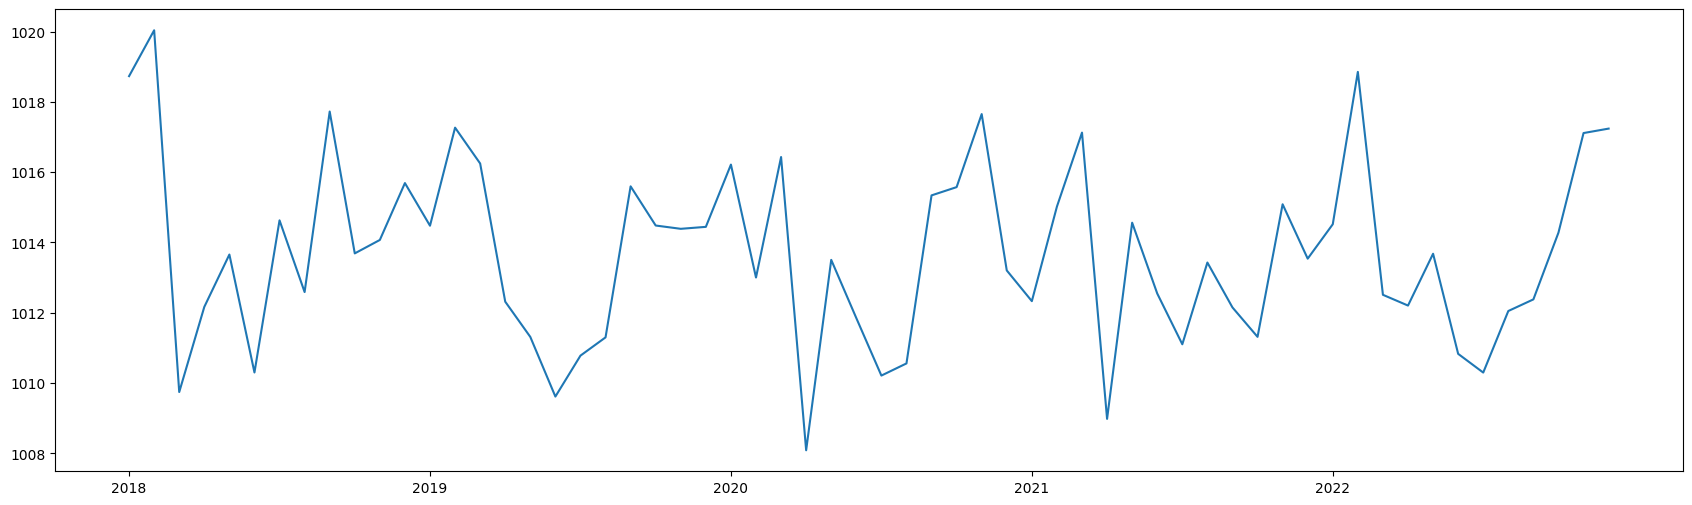

In [85]:
mslp_means = groupby_month(nysm_df, "mslp")

6324


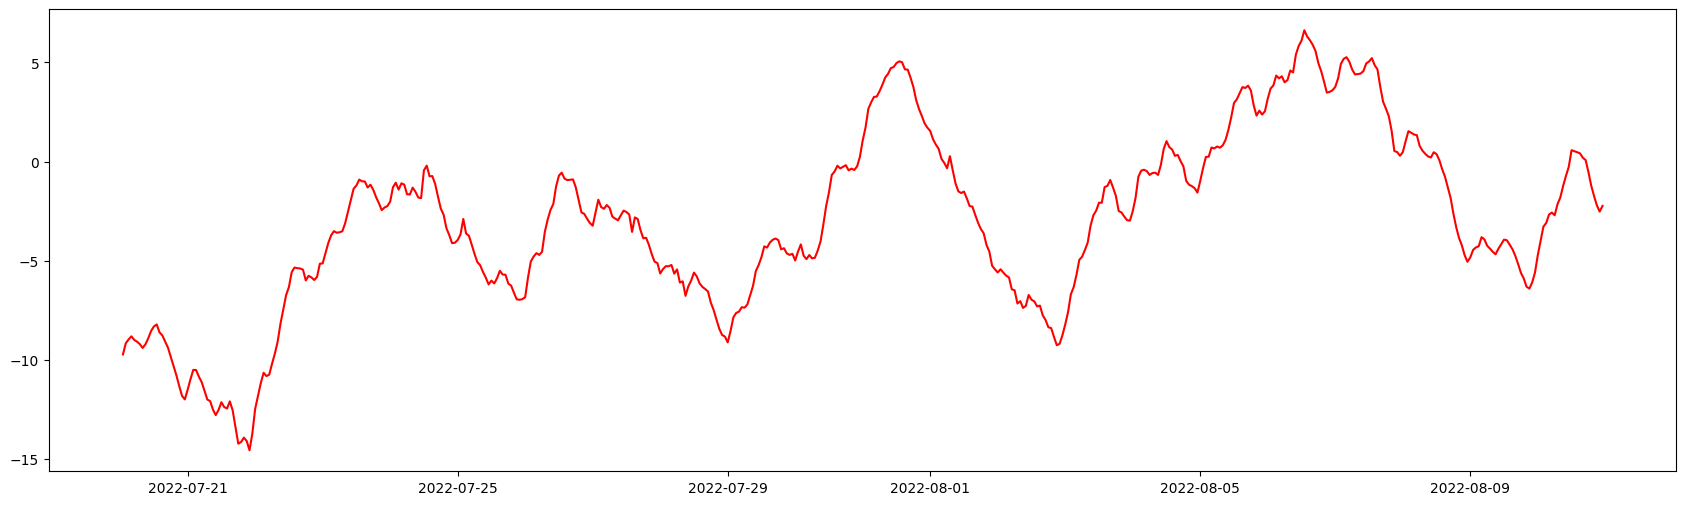

In [86]:
anoms_detection(nysm_df, mslp_means, "mslp")

/tmp/tmp.pWycJBnBmn/ipykernel_3266229/3865626854.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([2018, 2019, 2020, 2021, 2022])


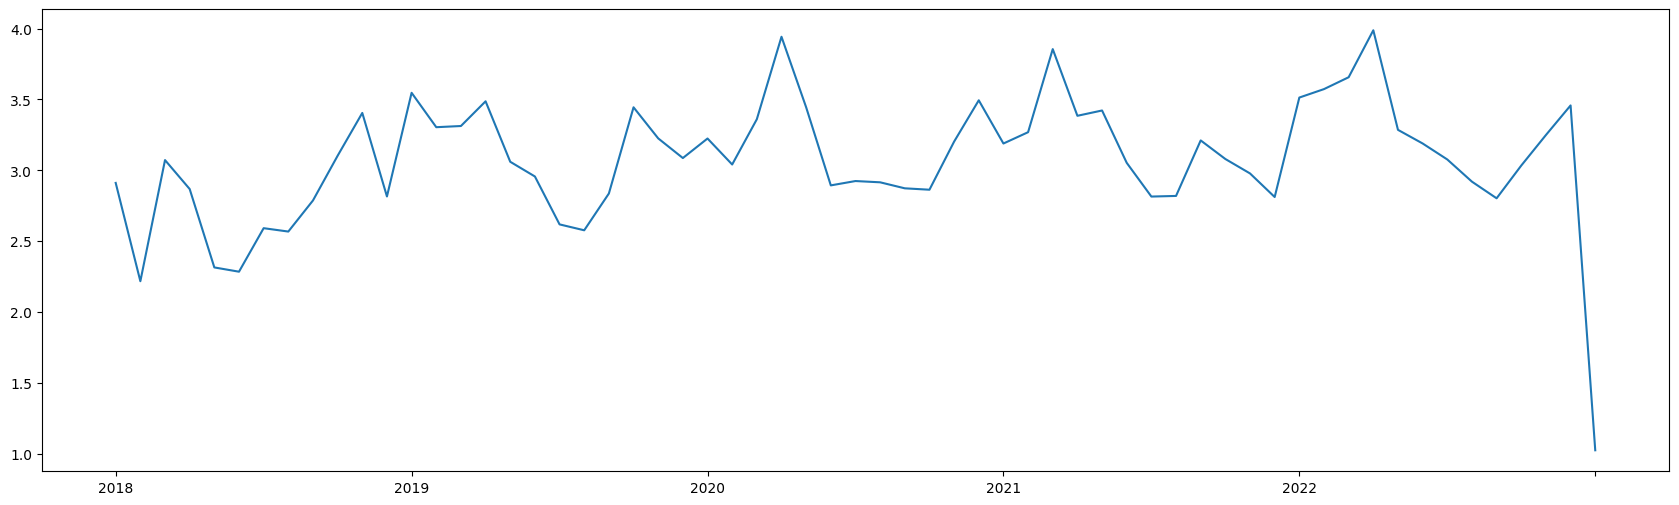

In [87]:
wspd_means = groupby_month(hrrr_df, "u_total")

6324


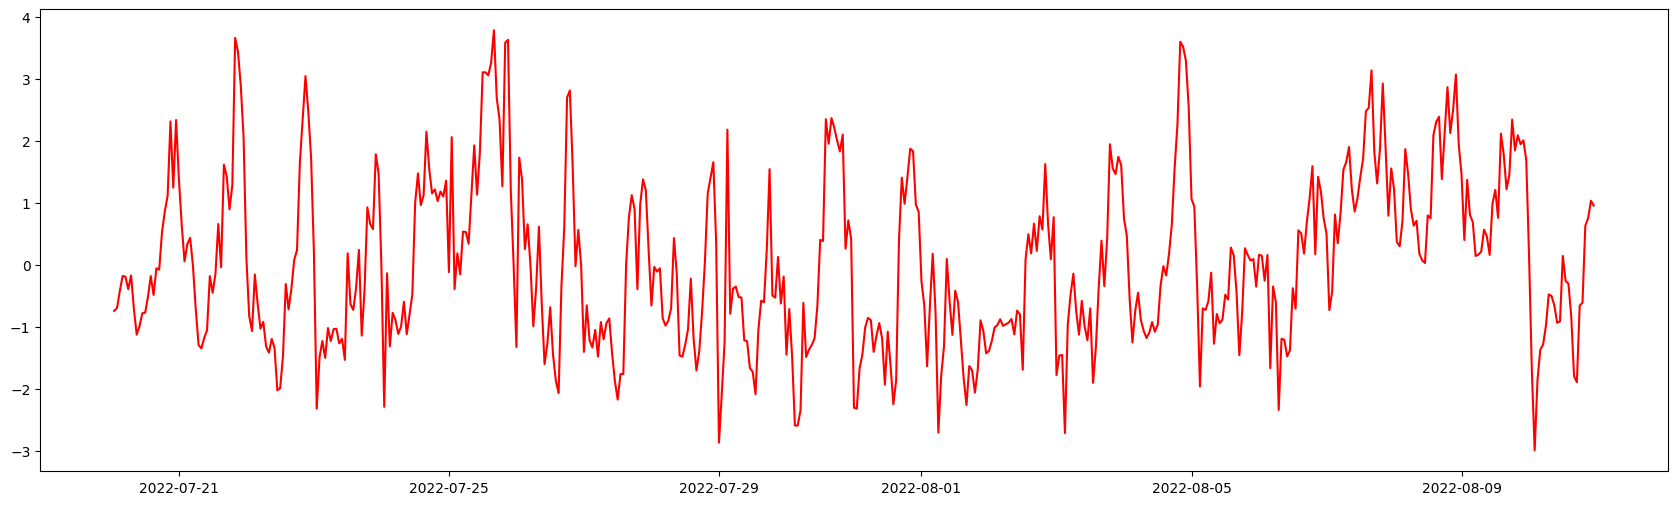

In [88]:
anoms_detection(hrrr_df, wspd_means, "u_total")

/tmp/tmp.pWycJBnBmn/ipykernel_3266229/3865626854.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([2018, 2019, 2020, 2021, 2022])


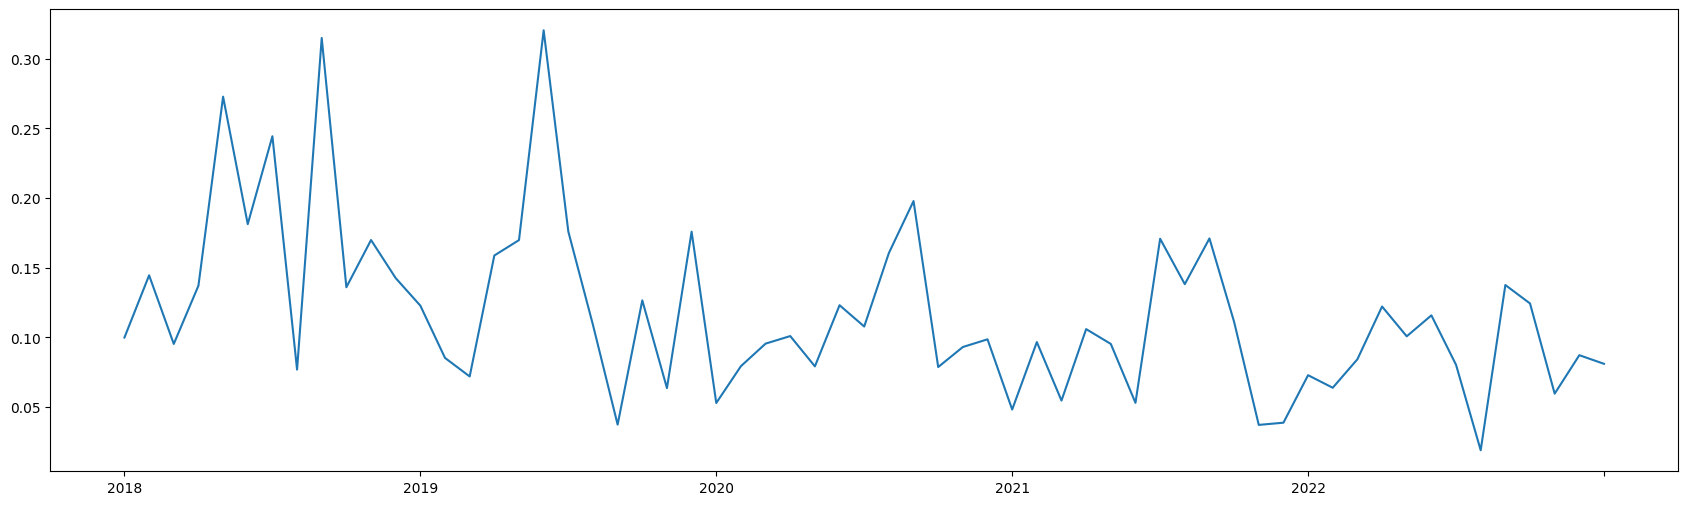

In [89]:
precip_means = groupby_month(hrrr_df, "new_tp")

6324


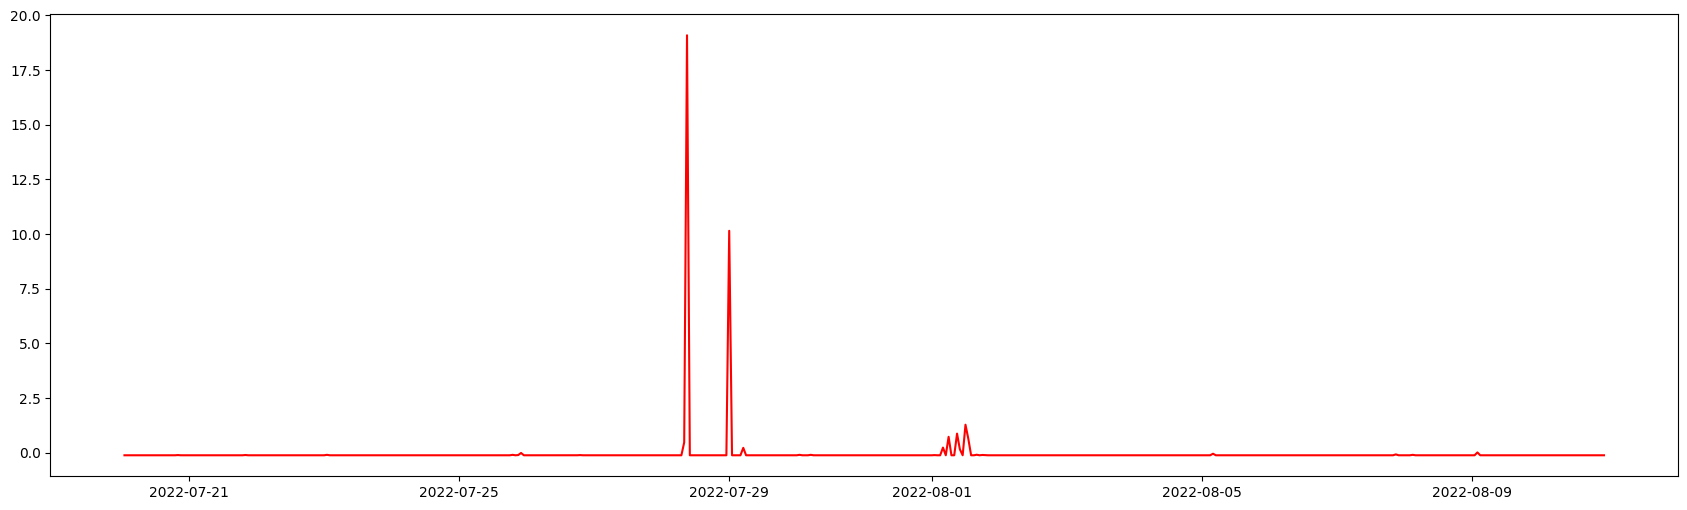

In [90]:
anoms_detection(hrrr_df, precip_means, "new_tp")

/tmp/tmp.pWycJBnBmn/ipykernel_3266229/3865626854.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([2018, 2019, 2020, 2021, 2022])


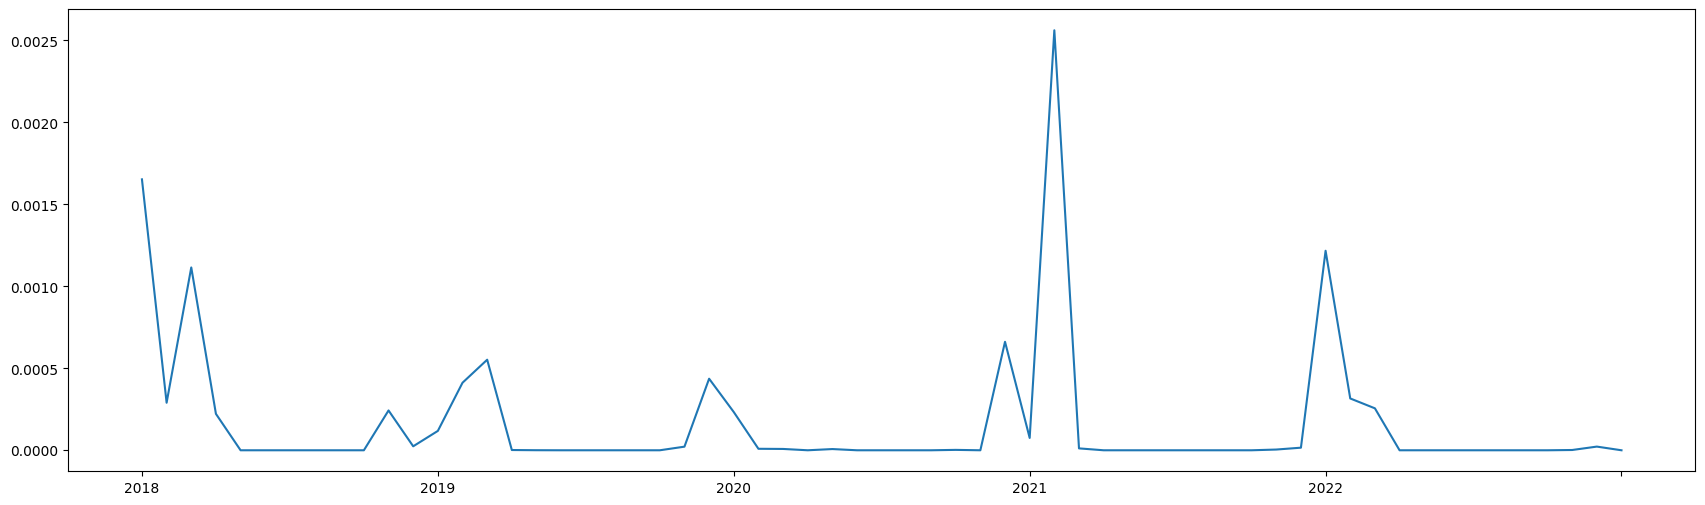

In [91]:
snow_means = groupby_month(hrrr_df, "asnow")

6324


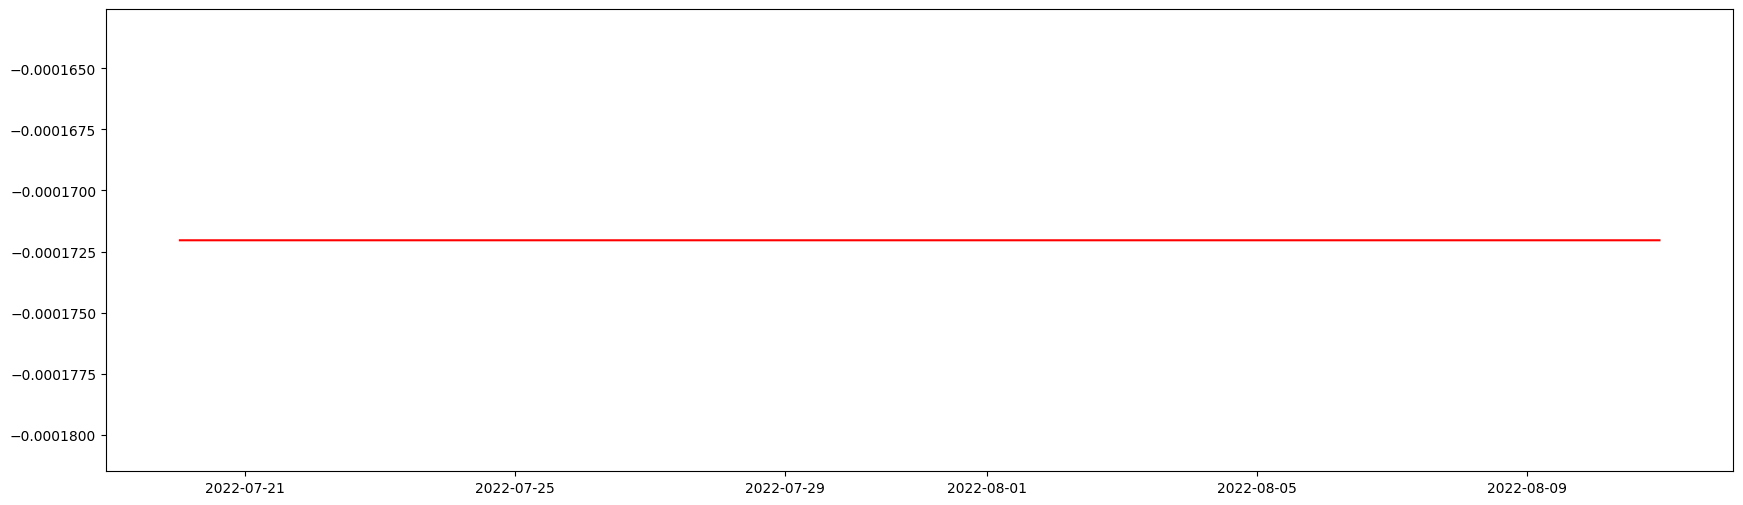

In [92]:
anoms_detection(hrrr_df, snow_means, "asnow")

In [93]:
# now we can estimate the IMFs for the signal
x = nysm_df["tair"]
imf = emd.sift.sift(x)
print(imf.shape)

/home/aevans/miniconda3/lib/python3.9/site-packages/emd/support.py:228: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


(43784, 9)


and, from the IMFs, compute the instantaneous frequency, phase and amplitude using the Normalised Hilbert Transform Method:

In [94]:
IP, IF, IA = emd.spectra.frequency_transform(imf, 23618, "hilbert")

From the instantaneous frequency and amplitude, we can compute the Hilbert-Huang spectrum:

In [95]:
# Define frequency range (low_freq, high_freq, nsteps, spacing)
freq_range = (0.1, 10, 80, "log")
f, hht = emd.spectra.hilberthuang(IF, IA, freq_range, sum_time=False)

In [96]:
# # visualize
# fig = plt.figure(figsize=(25, 3))
# plt.plot(nysm_df["tair"])

In [97]:
# df.iloc[:, 9:11]

Plot the IMFs

<Axes: xlabel='Time (samples)'>

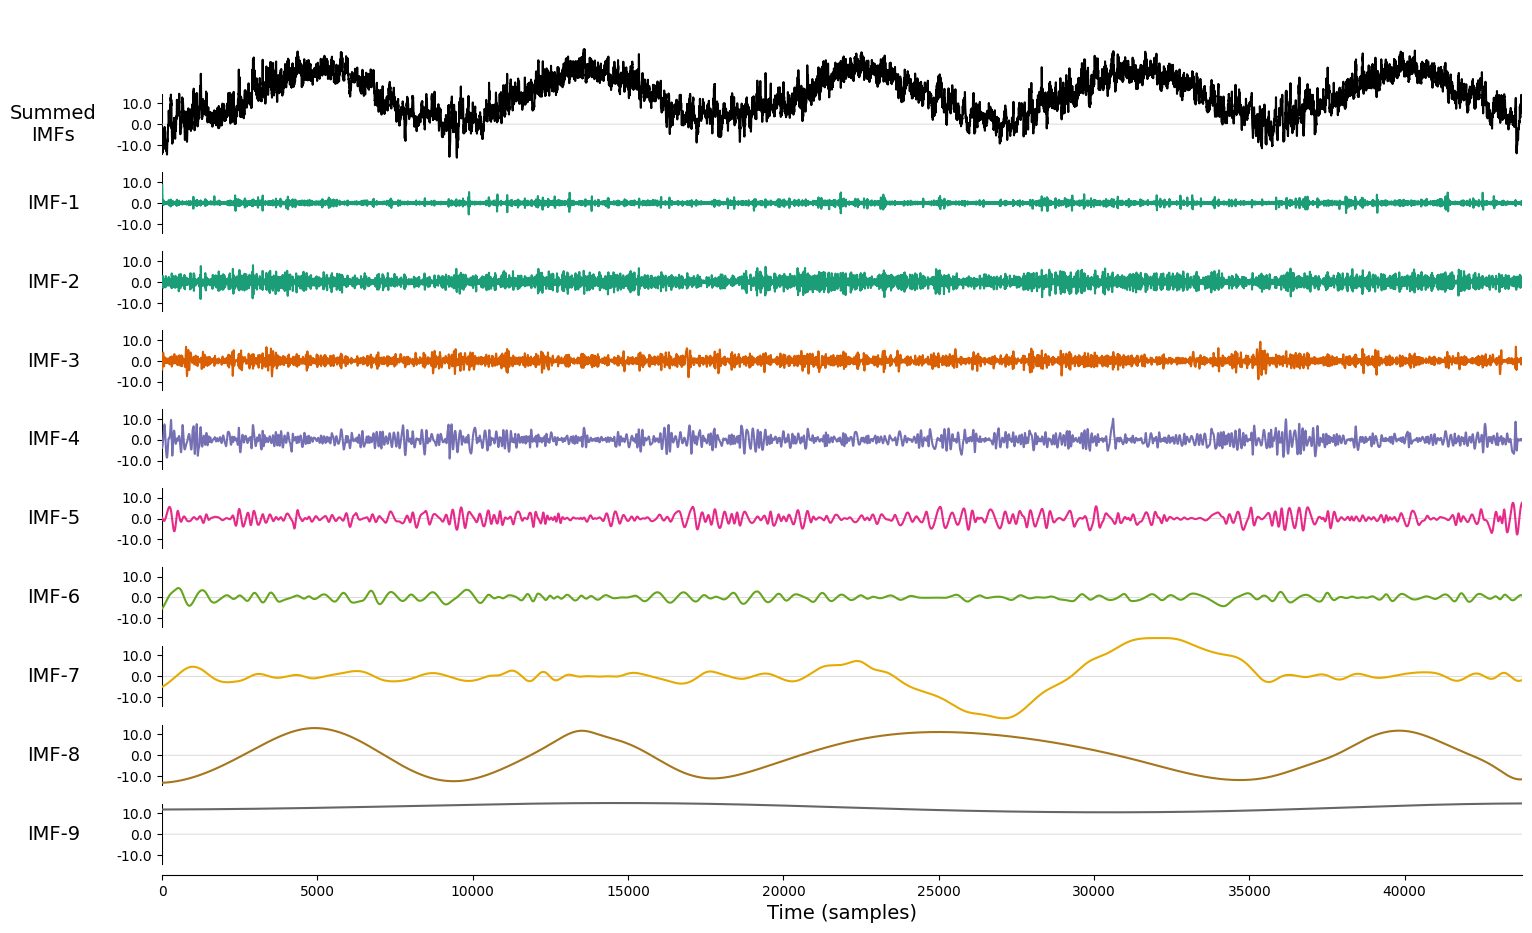

In [98]:
emd.plotting.plot_imfs(imf)

<Axes: title={'center': 'Hilbert-Huang Transform'}, xlabel='Time', ylabel='Frequency'>

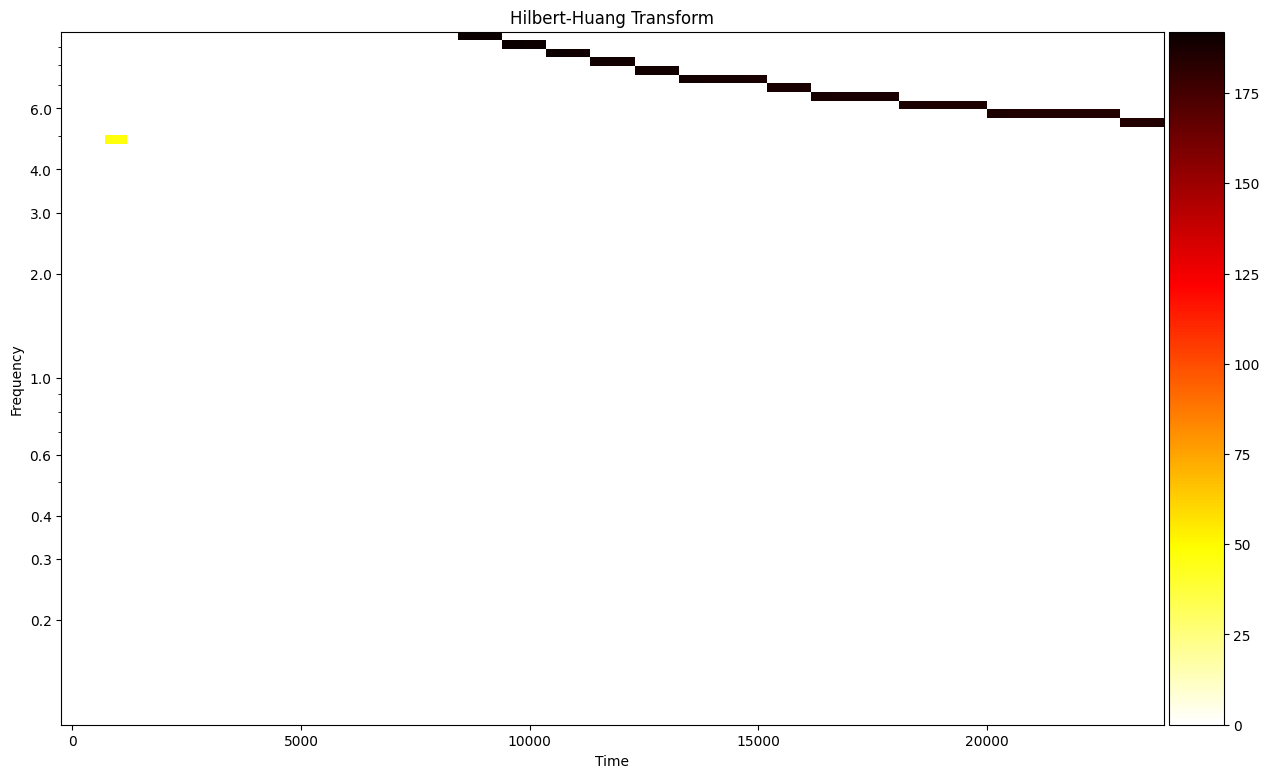

In [99]:
sample_rate = 23618
time_vect = np.linspace(0, sample_rate)
fig = plt.figure(figsize=(15, 9))
emd.plotting.plot_hilberthuang(hht, time_vect, f, fig=fig, log_y=True)

# ensemble sifting 

In [100]:
x = nysm_df["wspd_sonic"]
imf_opts = {"sd_thresh": 0.05}

/home/aevans/miniconda3/lib/python3.9/site-packages/emd/support.py:228: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompat

<Axes: xlabel='Time (samples)'>

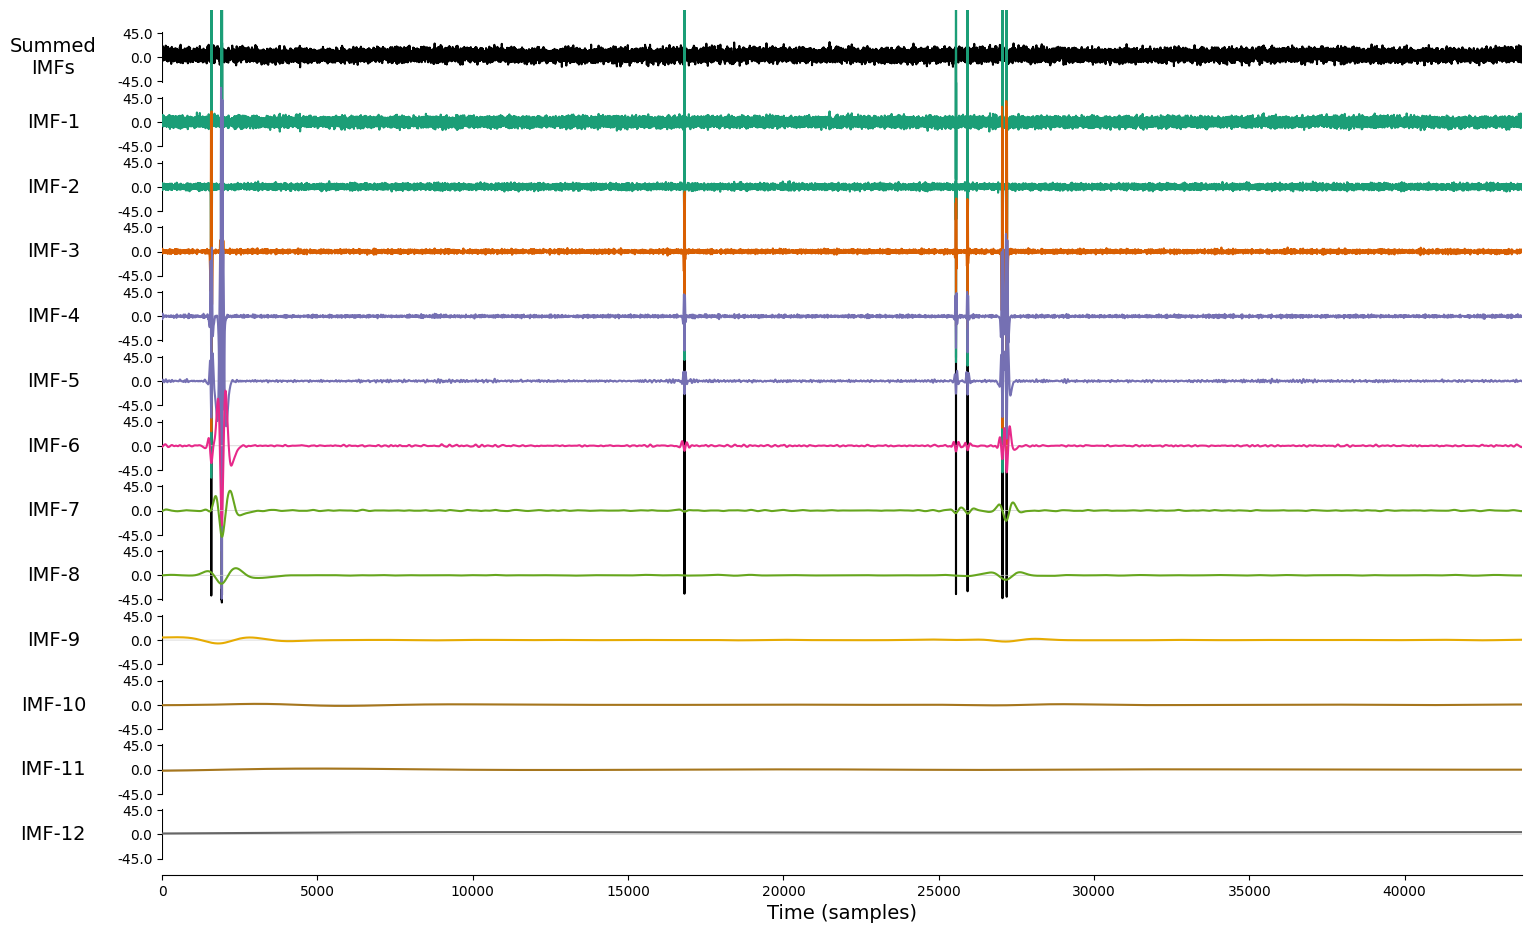

In [101]:
imf = emd.sift.ensemble_sift(
    x, nensembles=42, nprocesses=12, ensemble_noise=1, imf_opts=imf_opts
)
emd.plotting.plot_imfs(imf)

In [102]:
imf.shape

(43784, 12)

and now the Hilbert-Huang transform of this decomposition

In [103]:
sample_rate = 23618

time_vect = np.linspace(0, sample_rate - 0.5)

<Axes: title={'center': 'Hilbert-Huang Transform'}, xlabel='Time', ylabel='Frequency'>

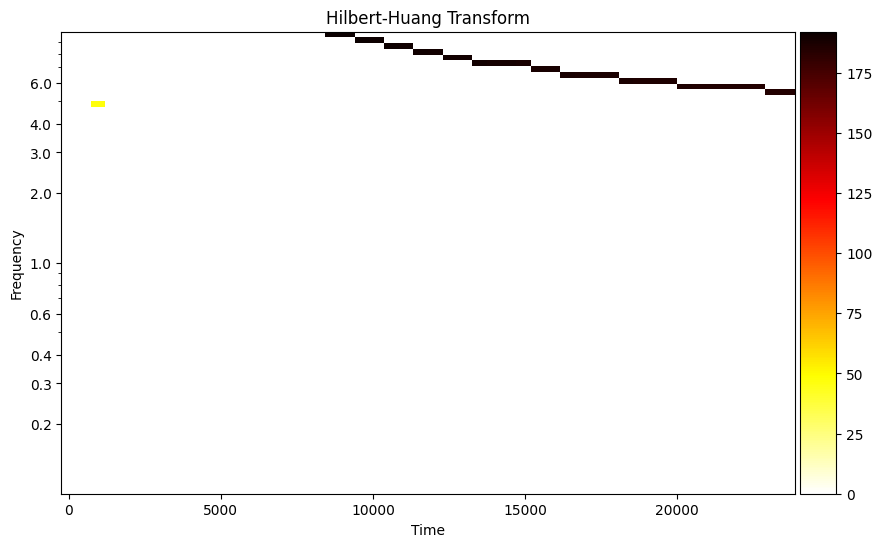

In [104]:
fig = plt.figure(figsize=(10, 6))
emd.plotting.plot_hilberthuang(hht, time_vect, f, fig=fig, log_y=True)